# **Project 1**
**Group 19**\
**Supreet - 002687930**\
**Samarth - 002780999**\
**Jacob - 001299743**


In [257]:
#importing the necessary libraries to perform the tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Task 1**

**Dataset 1**

In [3]:
#creating a dataframe using the first dataset 
df1 = pd.read_csv('Data1.csv')

In [256]:
#displaying the first dataframe 
df1

Unnamed: 0        X1        X2        X3  Class
0             1 -0.063274  0.027734  0.022683      1
1             2 -0.000731  0.048211  0.069198      1
2             3 -0.060767 -0.009080  0.053085      1
3             4  0.013252 -0.011876  0.055324      1
4             5 -0.054508 -0.003813  0.001738      1
..          ...       ...       ...       ...    ...
207         208  0.175738 -0.053478 -2.733752      7
208         209  0.396046 -0.858377 -3.126866      7
209         210 -0.406362 -0.334541 -2.885598      7
210         211 -0.299275  0.071281 -3.642585      7
211         212 -0.506192  0.433538 -2.608597      7

[212 rows x 5 columns]

In [5]:
#using the head() function to display the first five rows of the dataset
df1.head()

Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1

In [258]:
#here, we are implementing the elbow method to determine the optimal number of clusters
k = []
wcss = []
for i in range(1,11):
  mdl = KMeans(n_clusters = i, n_init = 10)
  mdl.fit(df1.iloc[:,1:4])
  k.append(i)
  wcss.append(mdl.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

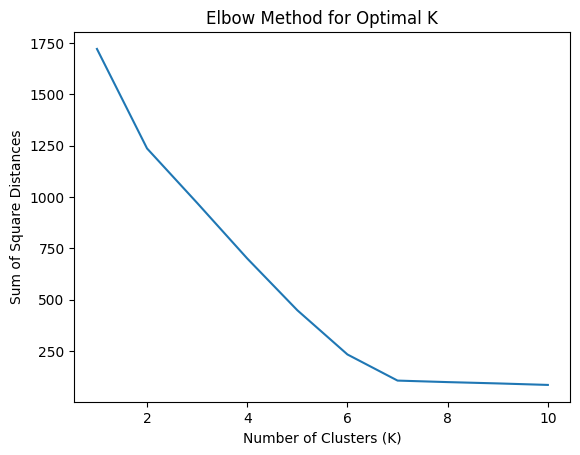

In [259]:
#creating an elbow plot to find the number of clusters
#here k denotes the number of clusters and wcss stands for within-cluster sum of squares

sns.lineplot(x = k, y = wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")

In [260]:
#we are now generating labels since we know the optimal number of clusters from the above graph
KModel = KMeans(n_clusters = 7,
             init = 'k-means++',)
KModel.fit(df1.iloc[:,1:4])

KMeans(n_clusters=7)

In [261]:
#displaying the array generated
KModel.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [262]:
#here we are returning the coordinates of the centroids of the clusters
KModel.cluster_centers_

array([[ 2.27123000e-02, -2.96813597e+00, -1.11774567e-01],
       [ 2.99953830e+00, -1.13086667e-03, -1.40059600e-01],
       [ 1.39986933e-01,  3.08174697e+00,  7.45050000e-02],
       [-4.24071875e-03,  4.75815625e-03,  7.24671875e-03],
       [-4.72621667e-02,  4.58006333e-02, -3.04276190e+00],
       [-2.99518840e+00, -1.37363333e-02,  8.82396000e-02],
       [-6.31190000e-03,  9.19421333e-02,  2.87236200e+00]])

In [17]:
#in this line, we are assigning the above coordinates to the centroid variable
centroid = KModel.cluster_centers_

In [18]:
#now we are assigning labels to the original dataset based on the values we obtained above
df1_cluster = df1.copy()
df1_cluster["Cluster"] = KModel.fit_predict(df1)

In [19]:
#displaying the first five rows of the updated dataframe
df1_cluster.head()

Unnamed: 0        X1        X2        X3  Class  Cluster
0           1 -0.063274  0.027734  0.022683      1        6
1           2 -0.000731  0.048211  0.069198      1        6
2           3 -0.060767 -0.009080  0.053085      1        6
3           4  0.013252 -0.011876  0.055324      1        6
4           5 -0.054508 -0.003813  0.001738      1        6

In [22]:
#in this line of code, we are creating an list of random colours to be able to visualize the graphs better
colours = ['Gold','Brown','Navy','Blue','Orange','green','yellow']

In [24]:
#here, a new column called color is being added to the dataframe
#we are also mapping values in the cluster column to their respective colours
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:colours[p])

In [25]:
#viewing the updated dataframe 
df1_cluster

Unnamed: 0        X1        X2        X3  Class  Cluster   Color
0             1 -0.063274  0.027734  0.022683      1        6  yellow
1             2 -0.000731  0.048211  0.069198      1        6  yellow
2             3 -0.060767 -0.009080  0.053085      1        6  yellow
3             4  0.013252 -0.011876  0.055324      1        6  yellow
4             5 -0.054508 -0.003813  0.001738      1        6  yellow
..          ...       ...       ...       ...    ...      ...     ...
207         208  0.175738 -0.053478 -2.733752      7        3    Blue
208         209  0.396046 -0.858377 -3.126866      7        3    Blue
209         210 -0.406362 -0.334541 -2.885598      7        3    Blue
210         211 -0.299275  0.071281 -3.642585      7        3    Blue
211         212 -0.506192  0.433538 -2.608597      7        3    Blue

[212 rows x 7 columns]

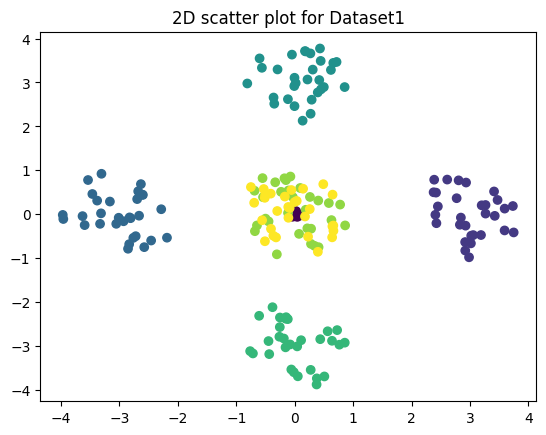

In [27]:
#we have created a 2-D scatter plot to visualize our data

%matplotlib inline
#plt.figure(figsize = (10, 10))
plt.title("2D scatter plot for Dataset1")
plt.scatter(df1_cluster['X1'],
           df1_cluster['X2'],
           c = df1_cluster['Class'])
plt.show()

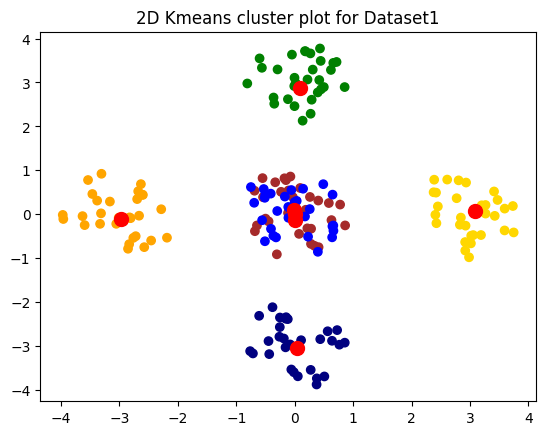

In [263]:
#here we are visualizing the various clusters in thier respective colors

%matplotlib inline
#plt.figure(figsize = (10, 10))
plt.title("2D Kmeans cluster plot for Dataset1")
plt.scatter(df1_cluster['X1'],
           df1_cluster['X2'],
           c = df1_cluster['Color'])
plt.scatter(centroid[:, 1], centroid[:, 2], c = 'red', s = 100)
plt.show()

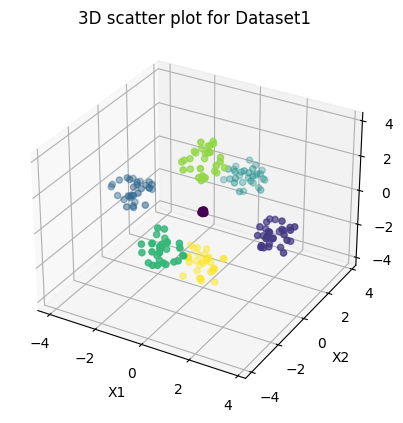

In [264]:
#in this block, we are creaing a 3-D scatter plot for the first dataset

%matplotlib notebook
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.ion()
plt.title("3D scatter plot for Dataset1")
ax.scatter(df1_cluster['X1'], df1_cluster['X2'], df1_cluster['X3'], c = df1_cluster['Class'], cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

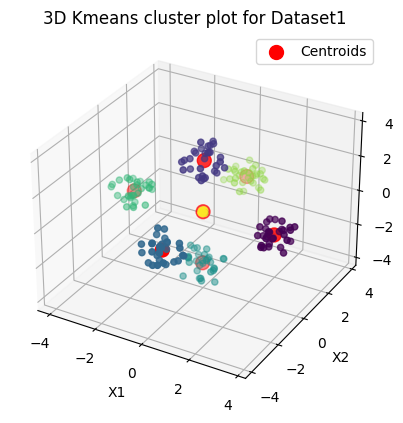

In [265]:
#in this segment, we are creating a 3-D cluster plot for the first dataset

%matplotlib notebook
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.ion()
plt.title("3D Kmeans cluster plot for Dataset1")
ax.scatter(df1_cluster['X1'], df1_cluster['X2'], df1_cluster['X3'], c = df1_cluster['Cluster'], cmap = 'viridis')
ax.scatter(centroid[:, 0], centroid[:, 1], centroid[:,2], c = 'red', s = 100, label = 'Centroids')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend()
plt.show()

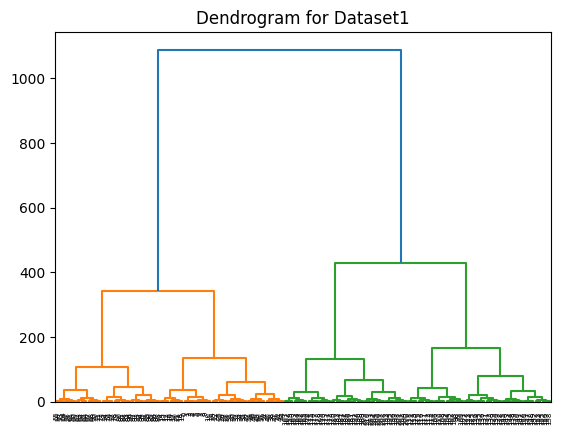

In [31]:
#here,we are performing hierarchical clustering through the means of a dendogram

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
dendrogram = sch.dendrogram(sch.linkage(df1_cluster.iloc[:,0:3], method = 'ward'))
plt.title('Dendrogram for Dataset1')
plt.show()

**Please refer the comments of the operations on the first dataset because we are implementing the same techniques for the further ones**

**Task 2**

In [35]:
df2 = pd.read_csv('Data2.csv')

In [36]:
df2

Unnamed: 0         X         Y         C  Class
0           X1  3.277701  0.814082  0.326574      1
1           X2  0.387577  0.176780  0.888046      1
2           X3  0.268546  0.582963  0.080981      1
3           X4  2.031145  0.244597  0.643921      1
4           X5  0.188677  0.461280  0.496633      1
..         ...       ...       ...       ...    ...
399       X400  3.248655  2.297291  3.388138      3
400          X  4.100000  5.100000  0.504558      4
401        X.1  3.900000  4.900000  0.941634      4
402        X.2  4.000000  5.000000  0.702123      4
403        X.3  4.100000  5.100000  0.887645      4

[404 rows x 5 columns]

In [37]:
#we are only selecting the columns required to perform appropriate operations 
df2_subset = df2[['X','Y','C','Class']]

In [38]:
df2_subset

X         Y         C  Class
0    3.277701  0.814082  0.326574      1
1    0.387577  0.176780  0.888046      1
2    0.268546  0.582963  0.080981      1
3    2.031145  0.244597  0.643921      1
4    0.188677  0.461280  0.496633      1
..        ...       ...       ...    ...
399  3.248655  2.297291  3.388138      3
400  4.100000  5.100000  0.504558      4
401  3.900000  4.900000  0.941634      4
402  4.000000  5.000000  0.702123      4
403  4.100000  5.100000  0.887645      4

[404 rows x 4 columns]

In [41]:
k2= []
wcss2 = []
for i in range(1,11):
  md2 = KMeans(n_clusters = i, n_init = 10)
  md2.fit(df2_subset.iloc[:,0:3])
  k2.append(i)
  wcss2.append(md2.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

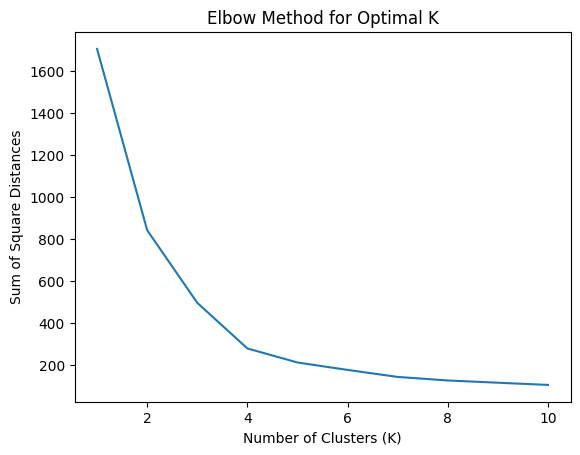

In [42]:
sns.lineplot(x = k2, y = wcss2)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")

In [43]:
KModel2 = KMeans(n_clusters = 4,
             init = 'k-means++',)
KModel2.fit(df2.iloc[:,1:4])

KMeans(n_clusters=4)

In [44]:
KModel2.labels_

array([0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 1,

In [45]:
KModel2.cluster_centers_

array([[3.04451388, 0.51152101, 0.48663013],
       [2.9348529 , 2.55931128, 2.55146488],
       [1.0118234 , 0.75530155, 0.5346417 ],
       [1.1534002 , 4.08301554, 1.04313881]])

In [48]:
centroid2 = KModel2.cluster_centers_

In [49]:
centroid2

array([[3.04451388, 0.51152101, 0.48663013],
       [2.9348529 , 2.55931128, 2.55146488],
       [1.0118234 , 0.75530155, 0.5346417 ],
       [1.1534002 , 4.08301554, 1.04313881]])

In [50]:
#Assigning labels to original dataset
df2_cluster = df2_subset.copy()
df2_cluster["Cluster"] = KModel2.fit_predict(df2_subset)

In [51]:
df2_cluster.head()

X         Y         C  Class  Cluster
0  3.277701  0.814082  0.326574      1        3
1  0.387577  0.176780  0.888046      1        1
2  0.268546  0.582963  0.080981      1        1
3  2.031145  0.244597  0.643921      1        3
4  0.188677  0.461280  0.496633      1        1

In [52]:
colours = ['Navy','Blue','Orange','green']

In [53]:
df2_cluster['Color'] = df2_cluster['Cluster'].map(lambda p:colours[p])

In [54]:
df2_cluster

X         Y         C  Class  Cluster  Color
0    3.277701  0.814082  0.326574      1        3  green
1    0.387577  0.176780  0.888046      1        1   Blue
2    0.268546  0.582963  0.080981      1        1   Blue
3    2.031145  0.244597  0.643921      1        3  green
4    0.188677  0.461280  0.496633      1        1   Blue
..        ...       ...       ...    ...      ...    ...
399  3.248655  2.297291  3.388138      3        0   Navy
400  4.100000  5.100000  0.504558      4        0   Navy
401  3.900000  4.900000  0.941634      4        0   Navy
402  4.000000  5.000000  0.702123      4        0   Navy
403  4.100000  5.100000  0.887645      4        0   Navy

[404 rows x 6 columns]

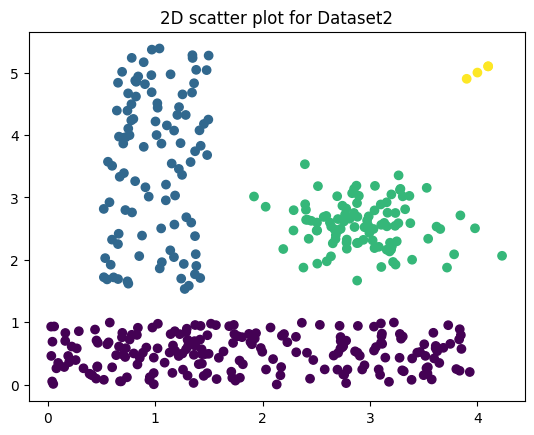

In [57]:
%matplotlib inline
plt.title("2D scatter plot for Dataset2")
plt.scatter(df2_cluster['X'],
           df2_cluster['Y'],
           c=df2_cluster['Class'])
plt.show()

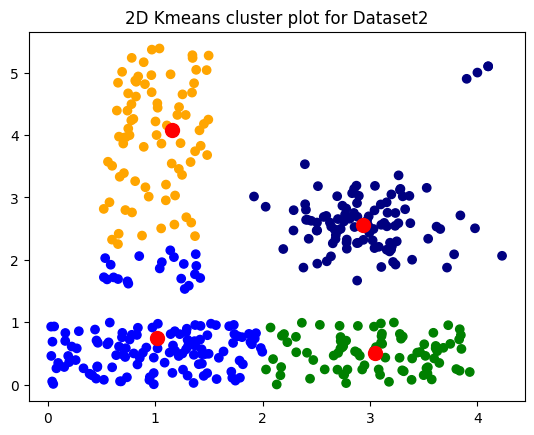

In [58]:
%matplotlib inline
plt.title("2D Kmeans cluster plot for Dataset2")
plt.scatter(df2_cluster['X'],
           df2_cluster['Y'],
           c = df2_cluster['Color'])
plt.scatter(centroid2[:,0], centroid2[:,1], c = 'red', s = 100)
plt.show()

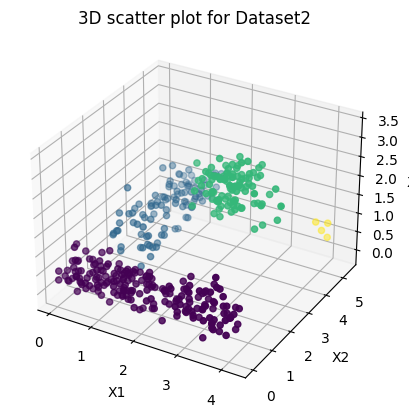

In [59]:
%matplotlib notebook
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("3D scatter plot for Dataset2")
plt.ion()
ax.scatter(df2_cluster['X'], df2_cluster['Y'], df2_cluster['C'], c = df2_cluster['Class'], cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

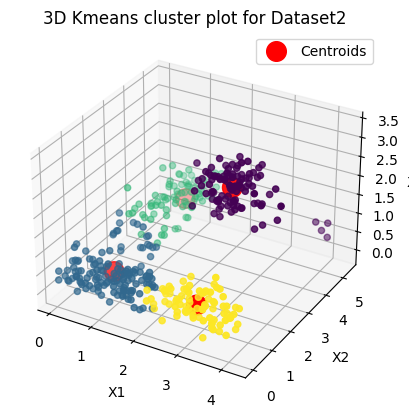

In [60]:
%matplotlib notebook
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.title("3D Kmeans cluster plot for Dataset2")
plt.ion()
ax.scatter(df2_cluster['X'], df2_cluster['Y'], df2_cluster['C'], c = df2_cluster['Cluster'], cmap = 'viridis')
ax.scatter(centroid2[:, 0], centroid2[:, 1], centroid2[:,2], c = 'red', s = 200, label = 'Centroids')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend()
plt.show()

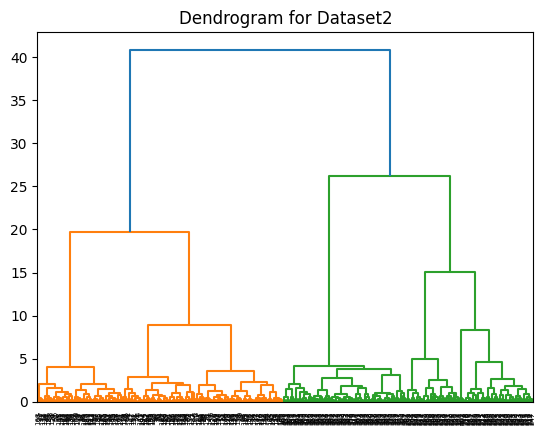

In [61]:
%matplotlib inline
dendrogram = sch.dendrogram(sch.linkage(df2_cluster.iloc[:,0:3], method = 'ward'))
plt.title('Dendrogram for Dataset2')
plt.show()

**Dataset 3**

In [62]:
df3 = pd.read_csv('Data3.csv')

In [63]:
df3

Unnamed: 0        X1        X2        X3  Class
0             1  1.295428  0.050829 -0.385217      1
1             2  1.409178 -0.035191 -0.251980      1
2             3  1.096803  0.246365 -0.415011      1
3             4  1.463328  0.265354 -0.513488      1
4             5  1.603284  0.080577 -0.470257      1
..          ...       ...       ...       ...    ...
395         396  0.795695  0.209456  1.880609      4
396         397  0.653127 -0.703156  1.549448      4
397         398 -0.726249 -0.103244  0.694300      4
398         399  0.808596 -0.492640  1.649370      4
399         400  0.749291 -0.447840  0.863555      4

[400 rows x 5 columns]

In [64]:
df3_subset = df3[['X1','X2','X3', 'Class']]

In [65]:
df3_subset

X1        X2        X3  Class
0    1.295428  0.050829 -0.385217      1
1    1.409178 -0.035191 -0.251980      1
2    1.096803  0.246365 -0.415011      1
3    1.463328  0.265354 -0.513488      1
4    1.603284  0.080577 -0.470257      1
..        ...       ...       ...    ...
395  0.795695  0.209456  1.880609      4
396  0.653127 -0.703156  1.549448      4
397 -0.726249 -0.103244  0.694300      4
398  0.808596 -0.492640  1.649370      4
399  0.749291 -0.447840  0.863555      4

[400 rows x 4 columns]

In [67]:
k3= []
wcss3 = []
for i in range(1,11):
  md3 = KMeans(n_clusters = i, n_init = 10)
  md3.fit(df3_subset.iloc[:,0:3])
  k3.append(i)
  wcss3.append(md3.inertia_)

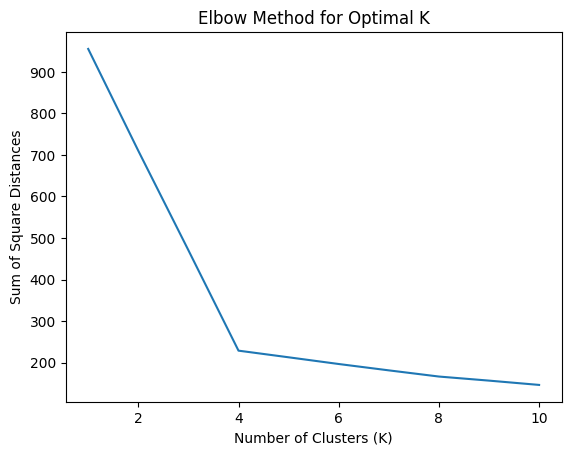

In [266]:
sns.lineplot(x = k3, y = wcss3)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [69]:
KModel3 = KMeans(n_clusters = 4,
             init = 'k-means++',)
KModel3.fit(df3_subset.iloc[:,0:3])

KMeans(n_clusters=4)

In [70]:
KModel3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

In [71]:
KModel3.cluster_centers_

array([[-0.51838252, -1.16526495, -0.42573357],
       [-0.51838252,  1.0347351 , -0.42573357],
       [ 1.3868734 , -0.06526492, -0.42573357],
       [ 0.11670268, -0.06526492,  1.37055896]])

In [72]:
centroid3 = KModel3.cluster_centers_

In [73]:
centroid3

array([[-0.51838252, -1.16526495, -0.42573357],
       [-0.51838252,  1.0347351 , -0.42573357],
       [ 1.3868734 , -0.06526492, -0.42573357],
       [ 0.11670268, -0.06526492,  1.37055896]])

In [75]:
df3_cluster = df3_subset.copy()
df3_cluster["Cluster"] = KModel3.fit_predict(df3_subset)

In [76]:
df3_cluster

X1        X2        X3  Class  Cluster
0    1.295428  0.050829 -0.385217      1        1
1    1.409178 -0.035191 -0.251980      1        1
2    1.096803  0.246365 -0.415011      1        1
3    1.463328  0.265354 -0.513488      1        1
4    1.603284  0.080577 -0.470257      1        1
..        ...       ...       ...    ...      ...
395  0.795695  0.209456  1.880609      4        2
396  0.653127 -0.703156  1.549448      4        2
397 -0.726249 -0.103244  0.694300      4        2
398  0.808596 -0.492640  1.649370      4        2
399  0.749291 -0.447840  0.863555      4        2

[400 rows x 5 columns]

In [77]:
colours3 = ['Navy','Blue','Orange','green']

In [78]:
df3_cluster['Color'] = df3_cluster['Cluster'].map(lambda p:colours3[p])

In [79]:
df3_cluster

X1        X2        X3  Class  Cluster   Color
0    1.295428  0.050829 -0.385217      1        1    Blue
1    1.409178 -0.035191 -0.251980      1        1    Blue
2    1.096803  0.246365 -0.415011      1        1    Blue
3    1.463328  0.265354 -0.513488      1        1    Blue
4    1.603284  0.080577 -0.470257      1        1    Blue
..        ...       ...       ...    ...      ...     ...
395  0.795695  0.209456  1.880609      4        2  Orange
396  0.653127 -0.703156  1.549448      4        2  Orange
397 -0.726249 -0.103244  0.694300      4        2  Orange
398  0.808596 -0.492640  1.649370      4        2  Orange
399  0.749291 -0.447840  0.863555      4        2  Orange

[400 rows x 6 columns]

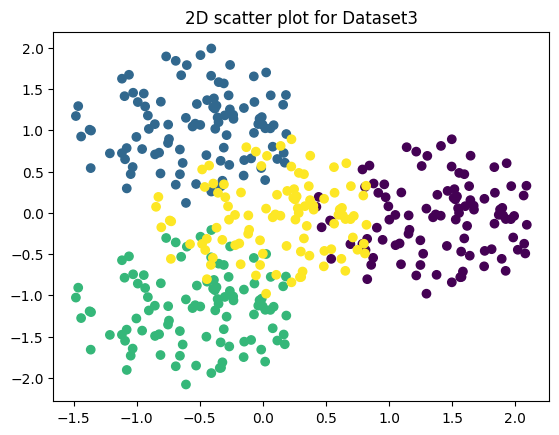

In [81]:
%matplotlib inline
plt.title("2D scatter plot for Dataset3")
plt.scatter(df3_cluster['X1'],
           df3_cluster['X2'],
           c = df3_cluster['Class'])
plt.show()

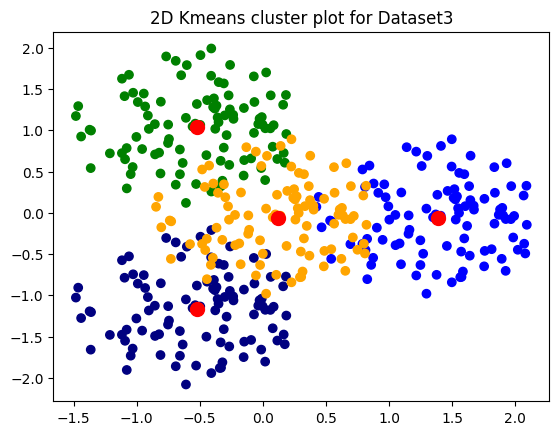

In [82]:
%matplotlib inline
plt.title("2D Kmeans cluster plot for Dataset3")
plt.scatter(df3_cluster['X1'],
           df3_cluster['X2'],
           c = df3_cluster['Color'])
plt.scatter(centroid3[:,0], centroid3[:,1], c = 'red', s = 100)
plt.show()

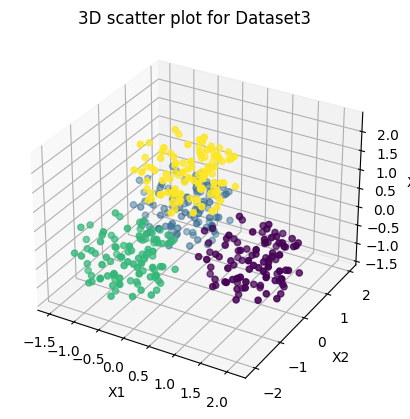

In [83]:
%matplotlib notebook
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("3D scatter plot for Dataset3")
ax.scatter(df3_cluster['X1'], df3_cluster['X2'], df3_cluster['X3'], c = df3_cluster['Class'], cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

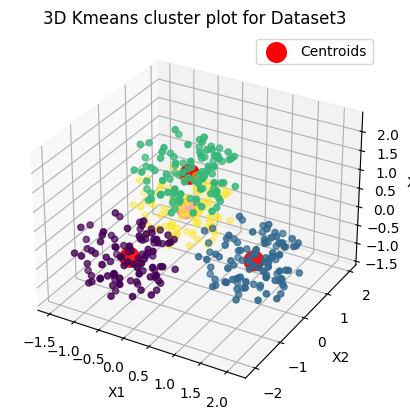

In [84]:
%matplotlib notebook
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("3D Kmeans cluster plot for Dataset3")
ax.scatter(df3_cluster['X1'], df3_cluster['X2'], df3_cluster['X3'], c = df3_cluster['Cluster'], cmap = 'viridis')
ax.scatter(centroid3[:, 0], centroid3[:, 1], centroid3[:,2], c = 'red', s = 200, label = 'Centroids')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend()
plt.show()

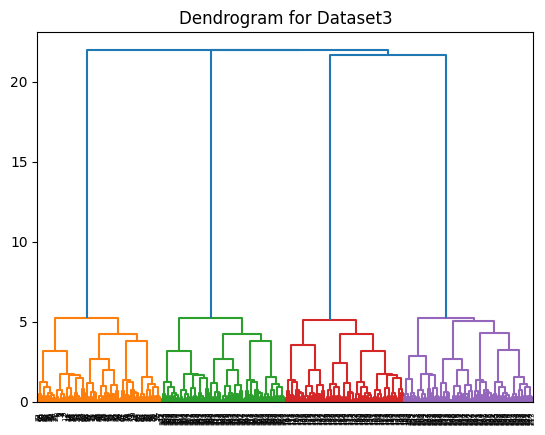

In [85]:
%matplotlib inline
dendrogram = sch.dendrogram(sch.linkage(df3_cluster.iloc[:,0:3], method = 'ward'))
plt.title('Dendrogram for Dataset3')
plt.show()

**Dataset 4**

In [86]:
df4 = pd.read_csv('Data4.csv')

In [87]:
df4

Unnamed: 0       X1      X2       X3  Class
0             1 -0.45300 -0.8910  0.02300      1
1             2  0.65300 -0.8460  0.02110      1
2             3  0.39800  0.9130 -0.00139      1
3             4  0.09520  1.0500  0.00628      1
4             5  0.52400 -0.9410  0.03780      1
..          ...      ...     ...      ...    ...
995         996  0.01520  0.0531 -0.36100      2
996         997  0.05160  0.6910  0.87500      2
997         998 -0.00511  1.3900 -0.94700      2
998         999 -0.06710  0.7140  0.88100      2
999        1000 -0.05770  0.4280 -0.73000      2

[1000 rows x 5 columns]

In [88]:
df4_subset = df4[['X1','X2','X3', 'Class']]

In [89]:
df4_subset

X1      X2       X3  Class
0   -0.45300 -0.8910  0.02300      1
1    0.65300 -0.8460  0.02110      1
2    0.39800  0.9130 -0.00139      1
3    0.09520  1.0500  0.00628      1
4    0.52400 -0.9410  0.03780      1
..       ...     ...      ...    ...
995  0.01520  0.0531 -0.36100      2
996  0.05160  0.6910  0.87500      2
997 -0.00511  1.3900 -0.94700      2
998 -0.06710  0.7140  0.88100      2
999 -0.05770  0.4280 -0.73000      2

[1000 rows x 4 columns]

In [90]:
k4 = []
wcss4 = []
for i in range(1,11):
  md4 = KMeans(n_clusters = i, n_init = 10)
  md4.fit(df4_subset.iloc[:,0:3])
  k4.append(i)
  wcss4.append(md4.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

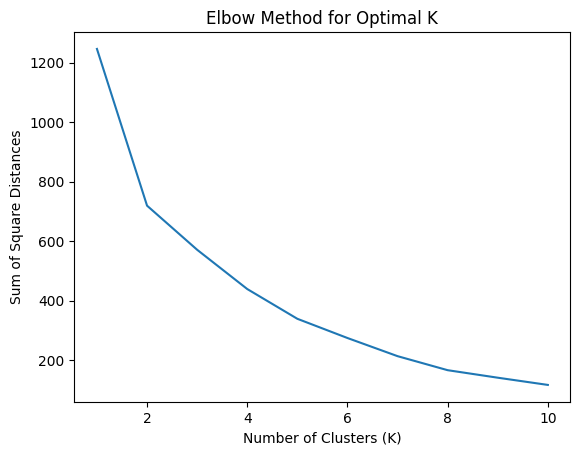

In [91]:
sns.lineplot(x = k4, y = wcss4)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")

In [92]:
#Generating labels
KModel4 = KMeans(n_clusters = 2,
             init = 'k-means++',)
KModel4.fit(df4_subset.iloc[:,0:3])

KMeans(n_clusters=2)

In [93]:
KModel4.labels_

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [94]:
KModel4.cluster_centers_

array([[-1.66176447e-02, -2.94129933e-01,  8.49923812e-03],
       [ 8.84493587e-04,  1.15671543e+00, -2.43330581e-02]])

In [95]:
centroid4 = KModel4.cluster_centers_

In [96]:
centroid4

array([[-1.66176447e-02, -2.94129933e-01,  8.49923812e-03],
       [ 8.84493587e-04,  1.15671543e+00, -2.43330581e-02]])

In [97]:
df4_cluster = df4_subset.copy()
df4_cluster["Cluster"] = KModel4.fit_predict(df4_subset)

In [98]:
df4_cluster

X1      X2       X3  Class  Cluster
0   -0.45300 -0.8910  0.02300      1        1
1    0.65300 -0.8460  0.02110      1        1
2    0.39800  0.9130 -0.00139      1        0
3    0.09520  1.0500  0.00628      1        0
4    0.52400 -0.9410  0.03780      1        1
..       ...     ...      ...    ...      ...
995  0.01520  0.0531 -0.36100      2        0
996  0.05160  0.6910  0.87500      2        0
997 -0.00511  1.3900 -0.94700      2        0
998 -0.06710  0.7140  0.88100      2        0
999 -0.05770  0.4280 -0.73000      2        0

[1000 rows x 5 columns]

In [99]:
colours4 = ['Blue','Orange']

In [100]:
df4_cluster['Color'] = df4_cluster['Cluster'].map(lambda p:colours4[p])

In [101]:
df4_cluster

X1      X2       X3  Class  Cluster   Color
0   -0.45300 -0.8910  0.02300      1        1  Orange
1    0.65300 -0.8460  0.02110      1        1  Orange
2    0.39800  0.9130 -0.00139      1        0    Blue
3    0.09520  1.0500  0.00628      1        0    Blue
4    0.52400 -0.9410  0.03780      1        1  Orange
..       ...     ...      ...    ...      ...     ...
995  0.01520  0.0531 -0.36100      2        0    Blue
996  0.05160  0.6910  0.87500      2        0    Blue
997 -0.00511  1.3900 -0.94700      2        0    Blue
998 -0.06710  0.7140  0.88100      2        0    Blue
999 -0.05770  0.4280 -0.73000      2        0    Blue

[1000 rows x 6 columns]

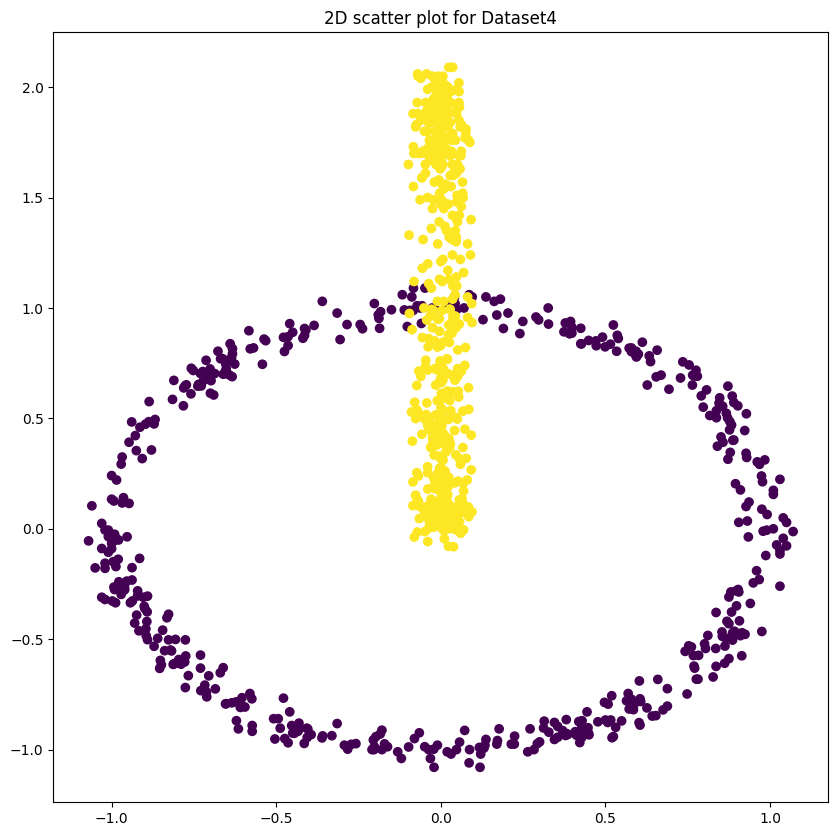

In [102]:
%matplotlib notebook
%matplotlib inline
plt.figure(figsize = (10, 10))
plt.title("2D scatter plot for Dataset4")
plt.scatter(df4_cluster['X1'],
           df4_cluster['X2'],
           c = df4_cluster['Class'])
plt.show()

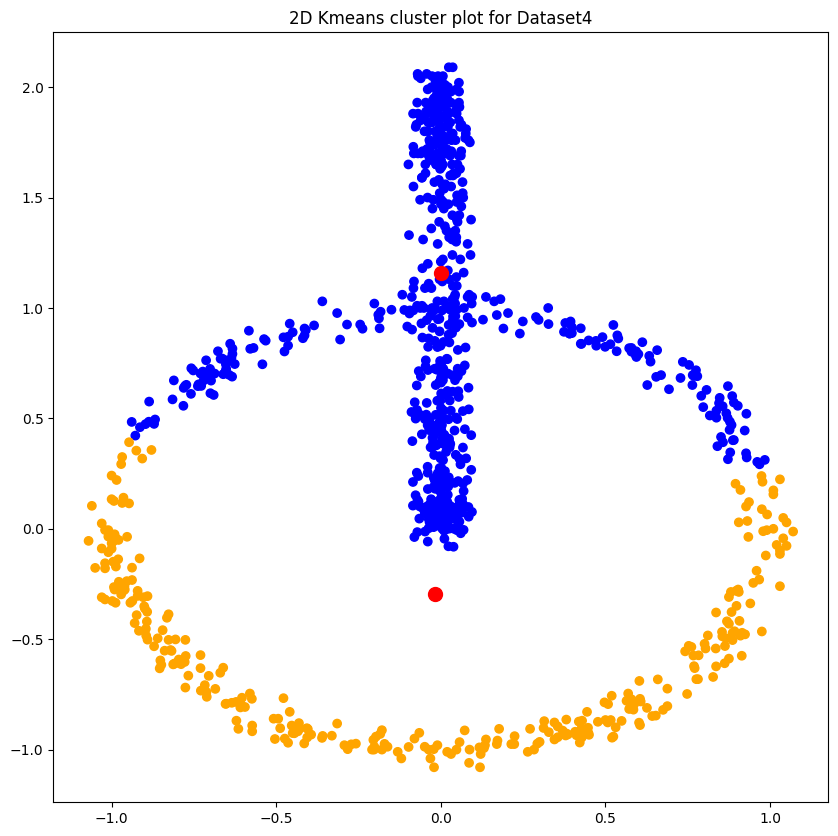

In [103]:
%matplotlib notebook
%matplotlib inline
plt.figure(figsize = (10, 10))
plt.title("2D Kmeans cluster plot for Dataset4")
plt.scatter(df4_cluster['X1'],
           df4_cluster['X2'],
           c = df4_cluster['Color'])
plt.scatter(centroid4[:,0], centroid4[:,1], c = 'red', s = 100)
plt.show()

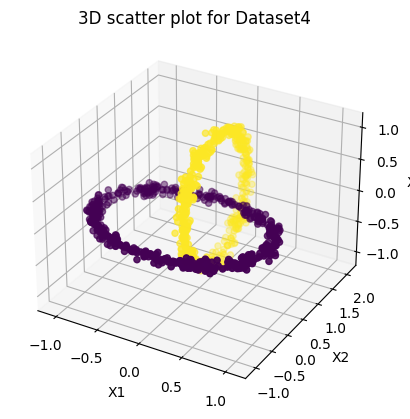

In [104]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("3D scatter plot for Dataset4")
ax.scatter(df4_cluster['X1'], df4_cluster['X2'], df4_cluster['X3'], c = df4_cluster['Class'], cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.ion()
plt.show()

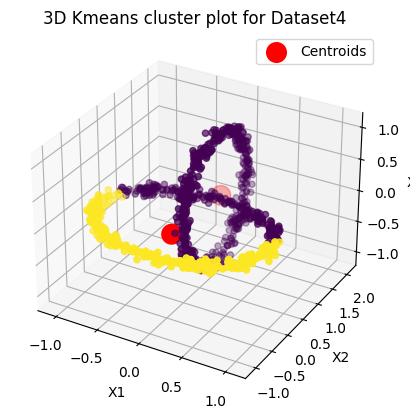

In [105]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("3D Kmeans cluster plot for Dataset4")
ax.scatter(df4_cluster['X1'], df4_cluster['X2'], df4_cluster['X3'], c = df4_cluster['Cluster'], cmap = 'viridis')
ax.scatter(centroid4[:, 0], centroid4[:, 1], centroid4[:,2], c = 'red', s = 200, label = 'Centroids')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend()
plt.ion()
plt.show()

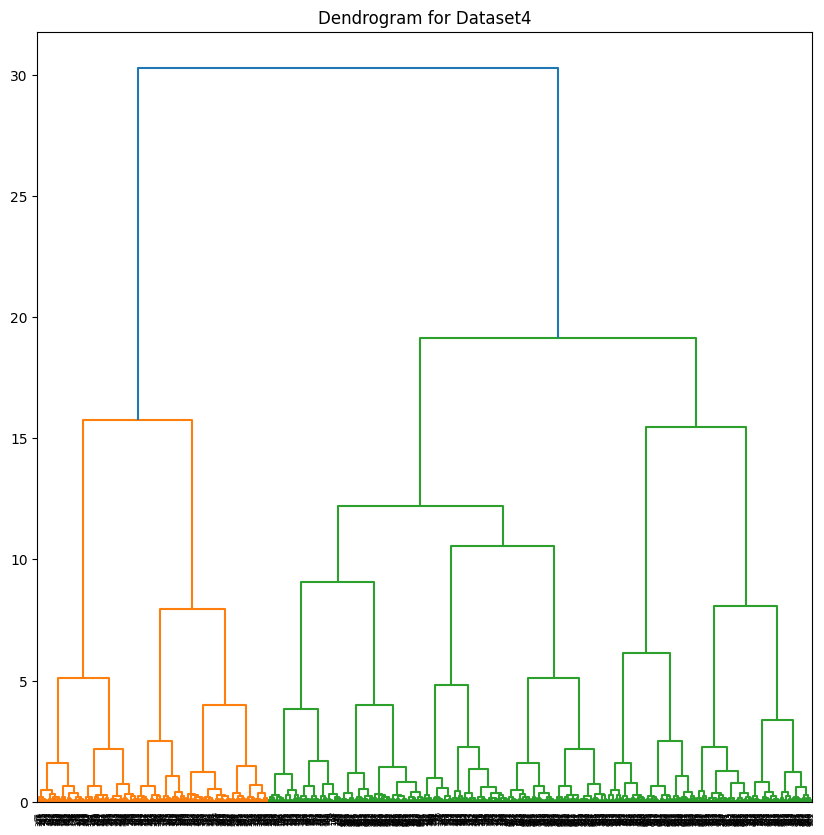

In [106]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
plt.figure(figsize = (10, 10))
dendrogram = sch.dendrogram(sch.linkage(df4_cluster.iloc[:,0:3], method = 'ward'))
plt.title('Dendrogram for Dataset4')
plt.show()

**Dataset 5**

In [107]:
df5 = pd.read_csv('Data5.csv')

In [108]:
df5

Unnamed: 0         X1         X2         X3  Class
0             1  -4.822490 -50.402170   4.020861      1
1             2 -44.460120  20.964670 -11.492060      1
2             3  50.001020   0.780748   9.134460      1
3             4 -41.699080 -22.310060  16.314120      1
4             5   4.425242  -4.666664  50.223740      1
..          ...        ...        ...        ...    ...
795         796  -1.531027   0.681636   0.543271      2
796         797   0.500754  -1.848209   0.605654      2
797         798   1.089574  -0.246493  -3.355758      2
798         799  -1.907717   4.964502   2.098423      2
799         800   3.415463   4.529521  -1.617736      2

[800 rows x 5 columns]

In [109]:
df5_subset = df5[['X1','X2','X3','Class']]

In [110]:
df5_subset

X1         X2         X3  Class
0    -4.822490 -50.402170   4.020861      1
1   -44.460120  20.964670 -11.492060      1
2    50.001020   0.780748   9.134460      1
3   -41.699080 -22.310060  16.314120      1
4     4.425242  -4.666664  50.223740      1
..         ...        ...        ...    ...
795  -1.531027   0.681636   0.543271      2
796   0.500754  -1.848209   0.605654      2
797   1.089574  -0.246493  -3.355758      2
798  -1.907717   4.964502   2.098423      2
799   3.415463   4.529521  -1.617736      2

[800 rows x 4 columns]

In [111]:
k5= []
wcss5 = []
for i in range(1,11):
  md5 = KMeans(n_clusters = i, n_init = 10)
  md5.fit(df5_subset.iloc[:,0:3])
  k5.append(i)
  wcss5.append(md5.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

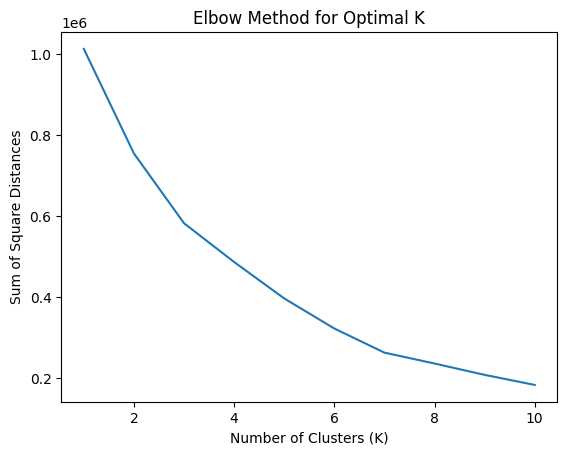

In [112]:
sns.lineplot(x = k5, y = wcss5)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")

In [113]:
KModel5 = KMeans(n_clusters = 2,
             init = 'k-means++',)
KModel5.fit(df5_subset.iloc[:,0:3])

KMeans(n_clusters=2)

In [114]:
KModel5.labels_

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [115]:
KModel5.cluster_centers_

array([[-9.01628338, -3.77555523, 34.10740302],
       [ 1.67324664, -0.14618357, -8.22394005]])

In [117]:
centroid5 = KModel5.cluster_centers_

In [118]:
centroid5

array([[-9.01628338, -3.77555523, 34.10740302],
       [ 1.67324664, -0.14618357, -8.22394005]])

In [119]:
df5_cluster = df5_subset.copy()
df5_cluster["Cluster"] = KModel5.fit_predict(df5_subset)

In [120]:
df5_cluster

X1         X2         X3  Class  Cluster
0    -4.822490 -50.402170   4.020861      1        1
1   -44.460120  20.964670 -11.492060      1        1
2    50.001020   0.780748   9.134460      1        1
3   -41.699080 -22.310060  16.314120      1        0
4     4.425242  -4.666664  50.223740      1        0
..         ...        ...        ...    ...      ...
795  -1.531027   0.681636   0.543271      2        1
796   0.500754  -1.848209   0.605654      2        1
797   1.089574  -0.246493  -3.355758      2        1
798  -1.907717   4.964502   2.098423      2        1
799   3.415463   4.529521  -1.617736      2        1

[800 rows x 5 columns]

In [121]:
colours5 = ['Blue','green']

In [122]:
df5_cluster['Color'] = df5_cluster['Cluster'].map(lambda p:colours5[p])

In [123]:
df5_cluster

X1         X2         X3  Class  Cluster  Color
0    -4.822490 -50.402170   4.020861      1        1  green
1   -44.460120  20.964670 -11.492060      1        1  green
2    50.001020   0.780748   9.134460      1        1  green
3   -41.699080 -22.310060  16.314120      1        0   Blue
4     4.425242  -4.666664  50.223740      1        0   Blue
..         ...        ...        ...    ...      ...    ...
795  -1.531027   0.681636   0.543271      2        1  green
796   0.500754  -1.848209   0.605654      2        1  green
797   1.089574  -0.246493  -3.355758      2        1  green
798  -1.907717   4.964502   2.098423      2        1  green
799   3.415463   4.529521  -1.617736      2        1  green

[800 rows x 6 columns]

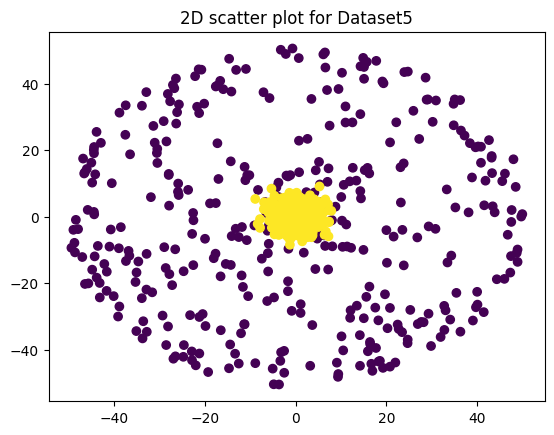

In [124]:
%matplotlib notebook
%matplotlib inline
plt.title("2D scatter plot for Dataset5")
plt.scatter(df5_cluster['X1'],
           df5_cluster['X2'],
           c = df5_cluster['Class'])
plt.show()

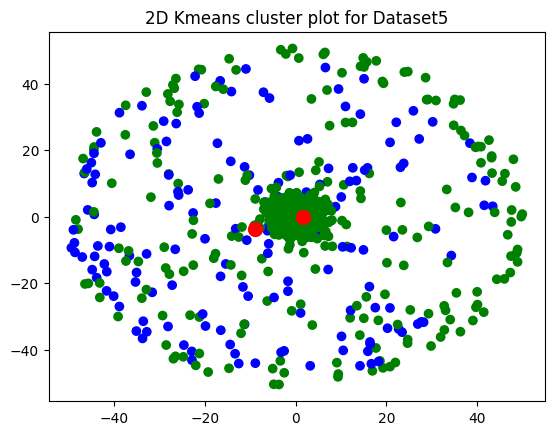

In [125]:
%matplotlib notebook
%matplotlib inline
plt.title("2D Kmeans cluster plot for Dataset5")
plt.scatter(df5_cluster['X1'],
           df5_cluster['X2'],
           c = df5_cluster['Color'])
plt.scatter(centroid5[:,0], centroid5[:,1], c = 'red', s = 100)
plt.show()

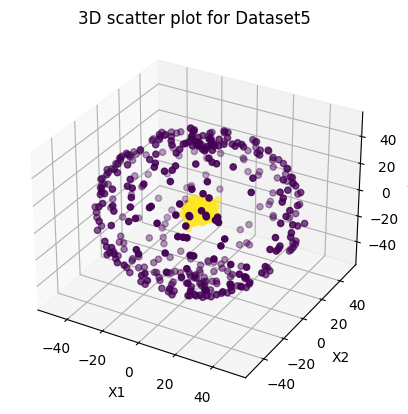

In [127]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.title("3D scatter plot for Dataset5")
ax.scatter(df5_cluster['X1'], df5_cluster['X2'], df5_cluster['X3'], c = df5_cluster['Class'], cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.ion()
plt.show()

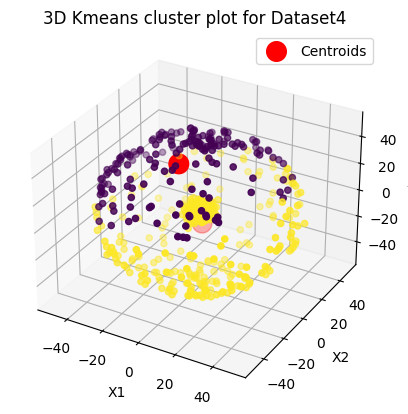

In [128]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.title("3D Kmeans cluster plot for Dataset4")
ax.scatter(df5_cluster['X1'], df5_cluster['X2'], df5_cluster['X3'], c = df5_cluster['Cluster'], cmap = 'viridis')
ax.scatter(centroid5[:, 0], centroid5[:, 1], centroid5[:,2], c = 'red', s = 200, label = 'Centroids')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend()
plt.ion()
plt.show()

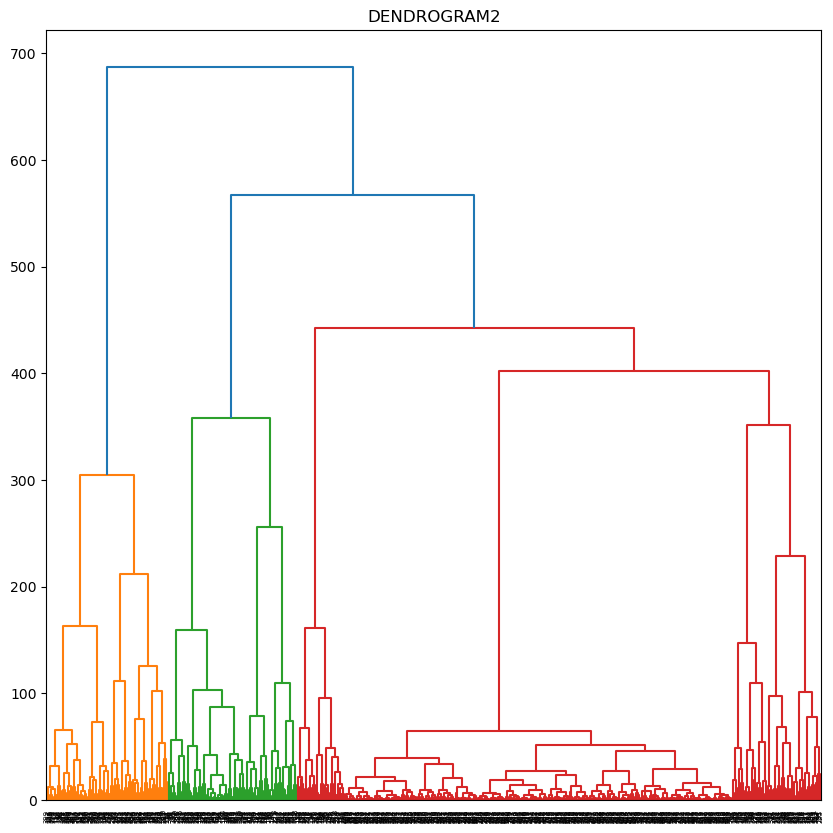

In [ ]:
%matplotlib inline
plt.figure(figsize = (10, 10))
dendrogram = sch.dendrogram(sch.linkage(df5_cluster.iloc[:,0:3], method = 'ward'))
plt.title('DENDROGRAM2')
plt.show()

**Dataset 6**

In [129]:
df6 = pd.read_csv('Data6.csv')

In [130]:
df6

Unnamed: 0        X1        X2  Class
0              1  1.388261  2.076096      1
1              2  2.177247  3.102304      1
2              3  0.378645  5.307610      1
3              4  3.681732  1.622681      1
4              5  2.462861  2.777897      1
...          ...       ...       ...    ...
4091        4092  0.909687  0.375763      2
4092        4093  2.698381  0.511262      2
4093        4094  1.078797  1.526153      2
4094        4095  1.974889 -0.649343      2
4095        4096 -0.127192 -0.763974      2

[4096 rows x 4 columns]

In [131]:
df6_subset = df6[['X1','X2','Class']]

In [132]:
df6_subset

X1        X2  Class
0     1.388261  2.076096      1
1     2.177247  3.102304      1
2     0.378645  5.307610      1
3     3.681732  1.622681      1
4     2.462861  2.777897      1
...        ...       ...    ...
4091  0.909687  0.375763      2
4092  2.698381  0.511262      2
4093  1.078797  1.526153      2
4094  1.974889 -0.649343      2
4095 -0.127192 -0.763974      2

[4096 rows x 3 columns]

In [133]:
k6= []
wcss6 = []
for i in range(1,11):
  md6 = KMeans(n_clusters = i, n_init = 10)
  md6.fit(df6_subset.iloc[:,0:2])
  k6.append(i)
  wcss6.append(md6.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

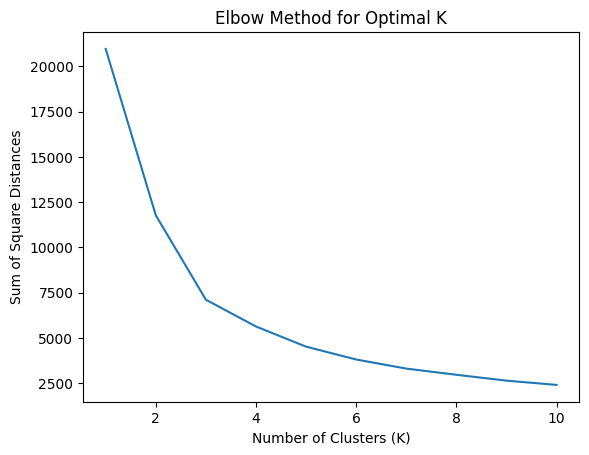

In [134]:
sns.lineplot(x = k6, y = wcss6)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")

In [135]:
KModel6 = KMeans(n_clusters = 3,
             init = 'k-means++',)
KModel6.fit(df6_subset.iloc[:,0:2])

KMeans(n_clusters=3)

In [136]:
KModel6.labels_

array([0, 2, 2, ..., 1, 1, 1], dtype=int32)

In [138]:
centroid6 = KModel6.cluster_centers_

In [139]:
centroid6

array([[2.97112836, 1.73077279],
       [0.33874351, 0.34163007],
       [0.99754282, 3.91330846]])

In [140]:
df6_cluster = df6_subset.copy()
df6_cluster["Cluster"] = KModel6.fit_predict(df6_subset)

In [141]:
df6_cluster

X1        X2  Class  Cluster
0     1.388261  2.076096      1        1
1     2.177247  3.102304      1        2
2     0.378645  5.307610      1        2
3     3.681732  1.622681      1        1
4     2.462861  2.777897      1        1
...        ...       ...    ...      ...
4091  0.909687  0.375763      2        0
4092  2.698381  0.511262      2        1
4093  1.078797  1.526153      2        0
4094  1.974889 -0.649343      2        0
4095 -0.127192 -0.763974      2        0

[4096 rows x 4 columns]

In [142]:
colours6 = ['Orange','green','blue']

In [143]:
df6_cluster['Color'] = df6_cluster['Cluster'].map(lambda p:colours6[p])

In [144]:
df6_cluster

X1        X2  Class  Cluster   Color
0     1.388261  2.076096      1        1   green
1     2.177247  3.102304      1        2    blue
2     0.378645  5.307610      1        2    blue
3     3.681732  1.622681      1        1   green
4     2.462861  2.777897      1        1   green
...        ...       ...    ...      ...     ...
4091  0.909687  0.375763      2        0  Orange
4092  2.698381  0.511262      2        1   green
4093  1.078797  1.526153      2        0  Orange
4094  1.974889 -0.649343      2        0  Orange
4095 -0.127192 -0.763974      2        0  Orange

[4096 rows x 5 columns]

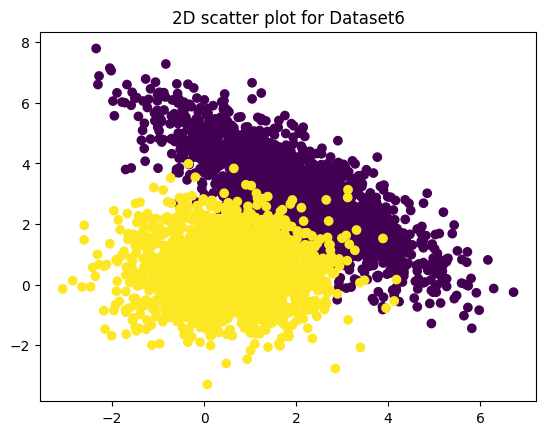

In [145]:
%matplotlib notebook
%matplotlib inline
plt.title("2D scatter plot for Dataset6")
plt.scatter(df6_cluster['X1'],
           df6_cluster['X2'],
           c = df6_cluster['Class'])
plt.show()

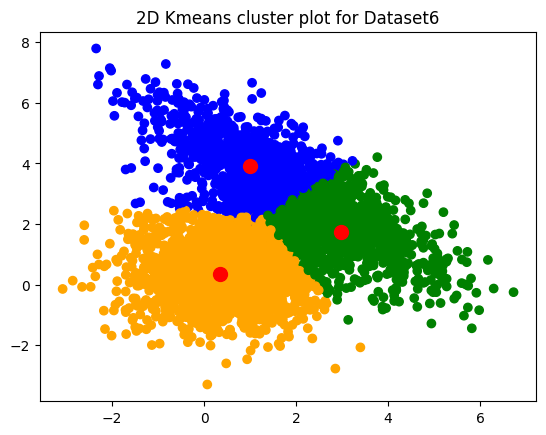

In [146]:
%matplotlib notebook
%matplotlib inline
plt.title("2D Kmeans cluster plot for Dataset6")
plt.scatter(df6_cluster['X1'],
           df6_cluster['X2'],
           c = df6_cluster['Color'])
plt.scatter(centroid6[:,0], centroid6[:,1], c = 'red', s = 100)
plt.show()

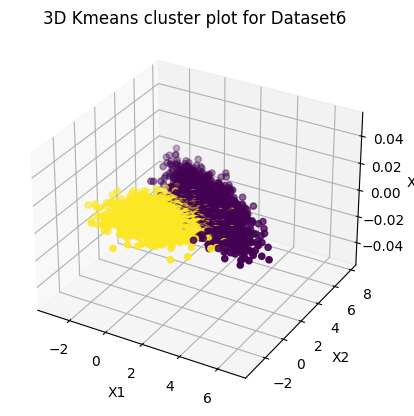

In [147]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("3D Kmeans cluster plot for Dataset6")
ax.scatter(df6_cluster['X1'], df6_cluster['X2'], c = df6_cluster['Class'], cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.ion()
plt.show()

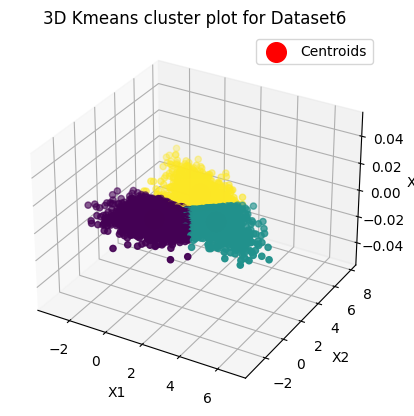

In [148]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.title("3D Kmeans cluster plot for Dataset6")
ax.scatter(df6_cluster['X1'], df6_cluster['X2'],c=df6_cluster['Cluster'],cmap='viridis')
ax.scatter(centroid6[:, 0], centroid6[:, 1], c = 'red', s = 200, label = 'Centroids')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend()
plt.ion()
plt.show()

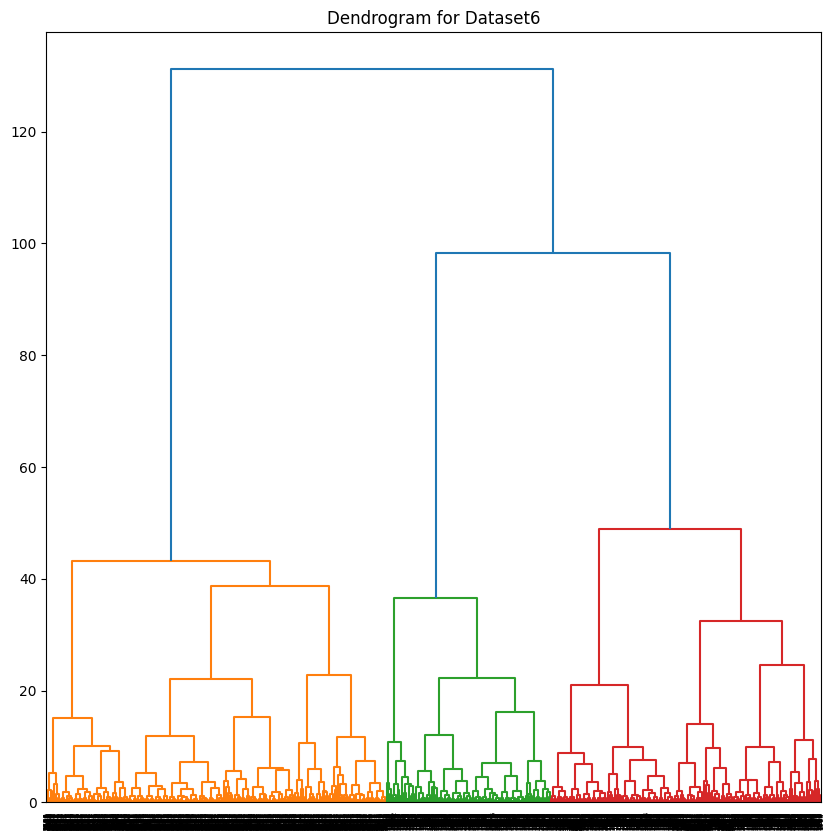

In [149]:
%matplotlib inline
plt.figure(figsize = (10, 10))
dendrogram = sch.dendrogram(sch.linkage(df6_cluster.iloc[:,0:2], method = 'ward'))
plt.title('Dendrogram for Dataset6')
plt.show()

**Dataset 7**

In [150]:
df7 = pd.read_csv('Data7.csv')

In [151]:
df7

Unnamed: 0        X1        X2  Class
0             1 -3.000000 -3.000000      5
1             2 -3.000000  3.000000      4
2             3  3.000000 -3.000000      6
3             4  3.000000  3.000000      3
4             5 -0.417091  0.114782      1
..          ...       ...       ...    ...
765         766 -1.604434 -1.118861      2
766         767 -3.050000 -3.050000      5
767         768 -3.050000  2.950000      4
768         769  2.950000 -3.050000      6
769         770  2.950000  2.950000      3

[770 rows x 4 columns]

In [152]:
df7_subset = df7[['X1','X2','Class']]

In [153]:
df7_subset

X1        X2  Class
0   -3.000000 -3.000000      5
1   -3.000000  3.000000      4
2    3.000000 -3.000000      6
3    3.000000  3.000000      3
4   -0.417091  0.114782      1
..        ...       ...    ...
765 -1.604434 -1.118861      2
766 -3.050000 -3.050000      5
767 -3.050000  2.950000      4
768  2.950000 -3.050000      6
769  2.950000  2.950000      3

[770 rows x 3 columns]

In [154]:
k7= []
wcss7 = []
for i in range(1,11):
  md7 = KMeans(n_clusters = i, n_init = 10)
  md7.fit(df7_subset.iloc[:,0:2])
  k7.append(i)
  wcss7.append(md7.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

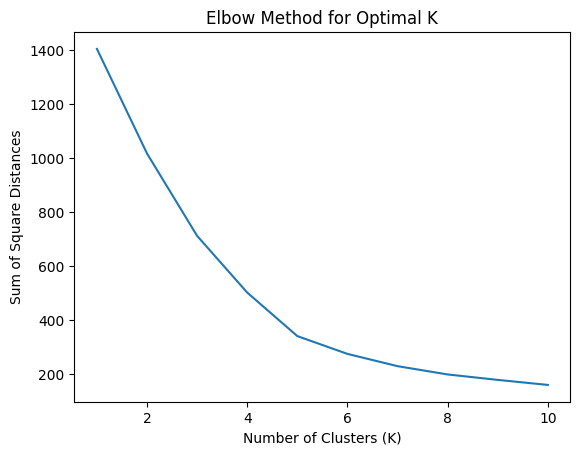

In [155]:
sns.lineplot(x = k7, y = wcss7)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")

In [156]:
#Generating labels
KModel7 = KMeans(n_clusters=5,
             init = 'k-means++',)
KModel7.fit(df7_subset.iloc[:,0:2])


KMeans(n_clusters=5)

In [157]:
KModel7.labels_

array([3, 1, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [158]:
centroid7 = KModel7.cluster_centers_

In [159]:
centroid7

array([[ 0.00909089, -0.02326302],
       [-1.24006227,  1.15081667],
       [ 1.32634626, -1.01080009],
       [-1.08116062, -1.30840123],
       [ 1.1258747 ,  1.25385075]])

In [160]:
df7_cluster = df7_subset.copy()
df7_cluster["Cluster"] = KModel7.fit_predict(df7_subset)

In [161]:
df7_cluster

X1        X2  Class  Cluster
0   -3.000000 -3.000000      5        4
1   -3.000000  3.000000      4        3
2    3.000000 -3.000000      6        1
3    3.000000  3.000000      3        2
4   -0.417091  0.114782      1        0
..        ...       ...    ...      ...
765 -1.604434 -1.118861      2        4
766 -3.050000 -3.050000      5        4
767 -3.050000  2.950000      4        3
768  2.950000 -3.050000      6        1
769  2.950000  2.950000      3        2

[770 rows x 4 columns]

In [163]:
colours7 = ['Orange','Yellow','Green','Blue','Navy']

In [164]:
df7_cluster['Color'] = df7_cluster['Cluster'].map(lambda p:colours7[p])

In [165]:
df7_cluster

X1        X2  Class  Cluster   Color
0   -3.000000 -3.000000      5        4    Navy
1   -3.000000  3.000000      4        3    Blue
2    3.000000 -3.000000      6        1  Yellow
3    3.000000  3.000000      3        2   Green
4   -0.417091  0.114782      1        0  Orange
..        ...       ...    ...      ...     ...
765 -1.604434 -1.118861      2        4    Navy
766 -3.050000 -3.050000      5        4    Navy
767 -3.050000  2.950000      4        3    Blue
768  2.950000 -3.050000      6        1  Yellow
769  2.950000  2.950000      3        2   Green

[770 rows x 5 columns]

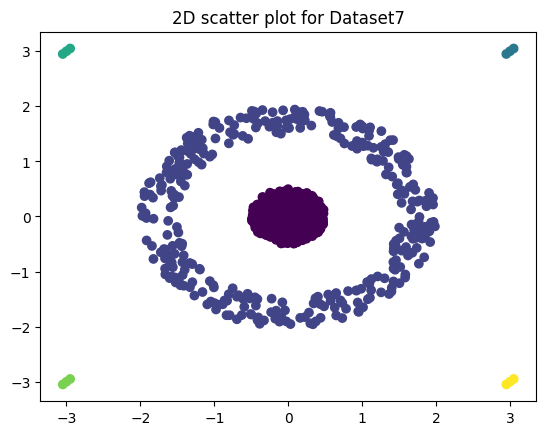

In [166]:
%matplotlib notebook
%matplotlib inline
plt.title("2D scatter plot for Dataset7")
plt.scatter(df7_cluster['X1'],
           df7_cluster['X2'],
           c = df7_cluster['Class'])
plt.show()

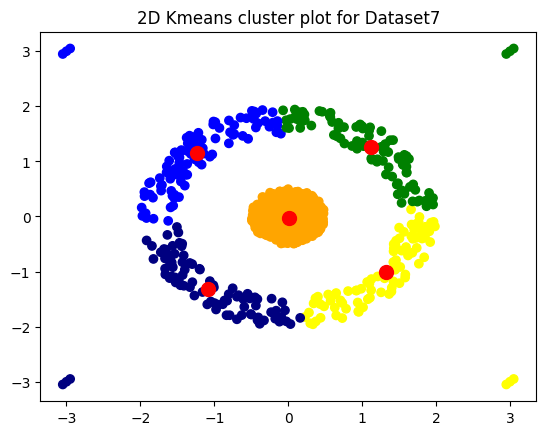

In [167]:
%matplotlib notebook
%matplotlib inline
plt.title("2D Kmeans cluster plot for Dataset7")
plt.scatter(df7_cluster['X1'],
           df7_cluster['X2'],
           c = df7_cluster['Color'])
plt.scatter(centroid7[:,0], centroid7[:,1], c = 'red', s = 100)
plt.show()

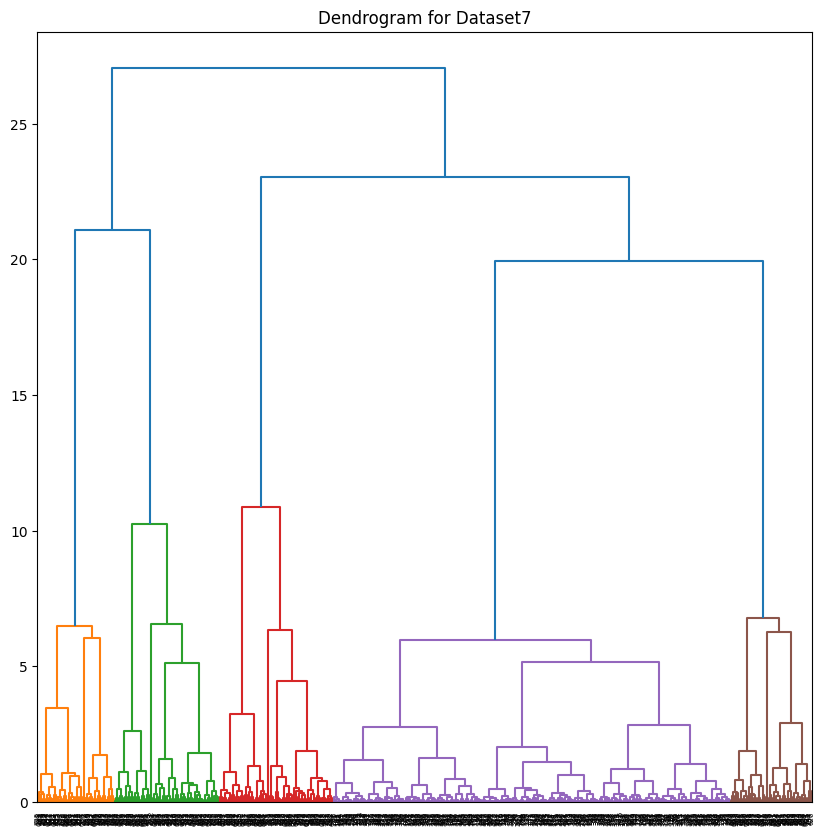

In [168]:
%matplotlib inline
plt.figure(figsize = (10, 10))
dendrogram = sch.dendrogram(sch.linkage(df7_cluster.iloc[:,0:2], method = 'ward'))
plt.title('Dendrogram for Dataset7')
plt.show()

**Dataset 8**

In [169]:
df8 = pd.read_csv('Data8.csv')

In [170]:
df8

Unnamed: 0        X1        X2       X3  Class
0              1  0.000000  0.000000  1.00000      1
1              2  0.000000  0.052336  0.99863      1
2              3  0.049774  0.016173  0.99863      1
3              4  0.030762 -0.042341  0.99863      1
4              5 -0.030762 -0.042341  0.99863      1
...          ...       ...       ...      ...    ...
3997        3998  0.049774 -0.016173 -0.99863      1
3998        3999  0.000000 -0.052336 -0.99863      1
3999        4000 -0.049774 -0.016173 -0.99863      1
4000        4001 -0.030762  0.042341 -0.99863      1
4001        4002  0.000000  0.000000 -1.00000      1

[4002 rows x 5 columns]

In [171]:
df8_subset = df8[['X1','X2','X3','Class']]

In [172]:
df8_subset

X1        X2       X3  Class
0     0.000000  0.000000  1.00000      1
1     0.000000  0.052336  0.99863      1
2     0.049774  0.016173  0.99863      1
3     0.030762 -0.042341  0.99863      1
4    -0.030762 -0.042341  0.99863      1
...        ...       ...      ...    ...
3997  0.049774 -0.016173 -0.99863      1
3998  0.000000 -0.052336 -0.99863      1
3999 -0.049774 -0.016173 -0.99863      1
4000 -0.030762  0.042341 -0.99863      1
4001  0.000000  0.000000 -1.00000      1

[4002 rows x 4 columns]

In [191]:
k8= []
wcss8 = []
for i in range(1,11):
  md8 = KMeans(n_clusters = i, n_init = 10)
  md8.fit(df7_subset.iloc[:,0:3])
  k8.append(i)
  wcss8.append(md8.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

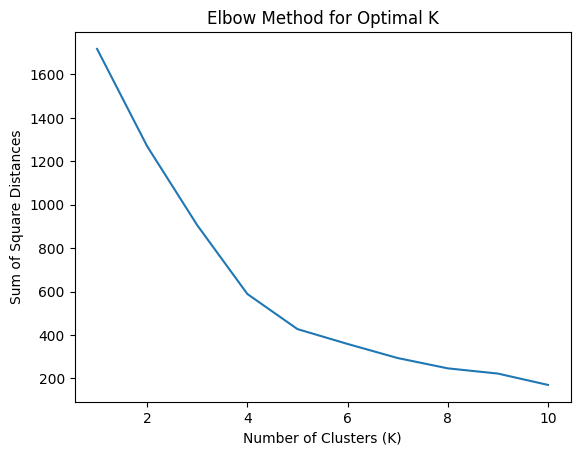

In [174]:
sns.lineplot(x = k8, y = wcss8)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")

In [175]:
KModel8 = KMeans(n_clusters=5,
             init = 'k-means++',)
KModel8.fit(df8_subset.iloc[:,0:3])

KMeans(n_clusters=5)

In [176]:
KModel8.labels_

array([1, 3, 3, ..., 2, 0, 0], dtype=int32)

In [177]:
centroid8 = KModel8.cluster_centers_

In [178]:
centroid8

array([[ 0.5869387 ,  0.13324775, -0.544568  ],
       [-0.57642499, -0.12393276,  0.55877565],
       [-0.53051364,  0.32847604, -0.47176031],
       [ 0.39200376,  0.44622627,  0.50523576],
       [ 0.12517378, -0.76384342, -0.04580884]])

In [179]:
df8_cluster = df8_subset.copy()
df8_cluster["Cluster"] = KModel8.fit_predict(df8_subset)

In [180]:
df8_cluster

X1        X2       X3  Class  Cluster
0     0.000000  0.000000  1.00000      1        4
1     0.000000  0.052336  0.99863      1        4
2     0.049774  0.016173  0.99863      1        4
3     0.030762 -0.042341  0.99863      1        4
4    -0.030762 -0.042341  0.99863      1        4
...        ...       ...      ...    ...      ...
3997  0.049774 -0.016173 -0.99863      1        1
3998  0.000000 -0.052336 -0.99863      1        1
3999 -0.049774 -0.016173 -0.99863      1        1
4000 -0.030762  0.042341 -0.99863      1        1
4001  0.000000  0.000000 -1.00000      1        1

[4002 rows x 5 columns]

In [181]:
colours8 = ['Brown','Green','Gold','Blue','Silver']

In [182]:
df8_cluster['Color'] = df8_cluster['Cluster'].map(lambda p:colours8[p])

In [183]:
df8_cluster

X1        X2       X3  Class  Cluster   Color
0     0.000000  0.000000  1.00000      1        4  Silver
1     0.000000  0.052336  0.99863      1        4  Silver
2     0.049774  0.016173  0.99863      1        4  Silver
3     0.030762 -0.042341  0.99863      1        4  Silver
4    -0.030762 -0.042341  0.99863      1        4  Silver
...        ...       ...      ...    ...      ...     ...
3997  0.049774 -0.016173 -0.99863      1        1   Green
3998  0.000000 -0.052336 -0.99863      1        1   Green
3999 -0.049774 -0.016173 -0.99863      1        1   Green
4000 -0.030762  0.042341 -0.99863      1        1   Green
4001  0.000000  0.000000 -1.00000      1        1   Green

[4002 rows x 6 columns]

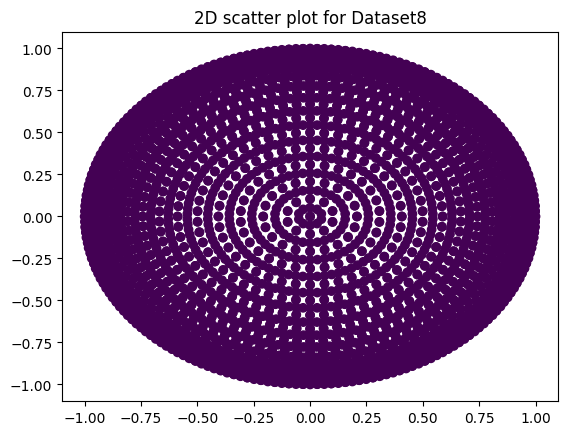

In [184]:
%matplotlib notebook
%matplotlib inline
plt.title("2D scatter plot for Dataset8")
plt.scatter(df8_cluster['X1'],
           df8_cluster['X2'],
           c = df8_cluster['Class'])
plt.show()

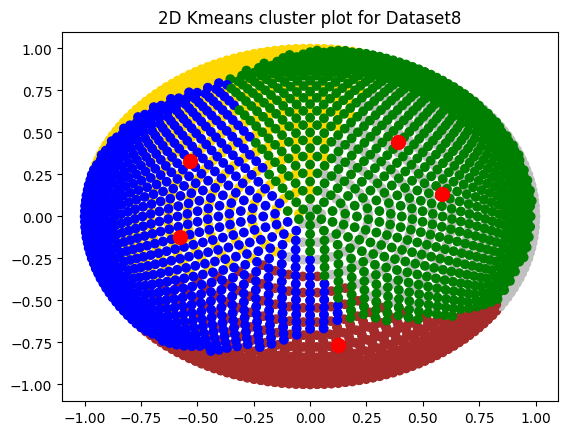

In [186]:
%matplotlib notebook
%matplotlib inline
plt.title("2D Kmeans cluster plot for Dataset8")
plt.scatter(df8_cluster['X1'],
           df8_cluster['X2'],
           c = df8_cluster['Color'])
plt.scatter(centroid8[:,0], centroid8[:,1], c = 'red', s = 100)
plt.show()

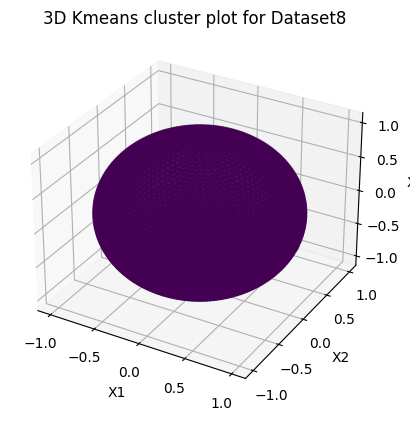

In [187]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("3D Kmeans cluster plot for Dataset8")
ax.scatter(df8_cluster['X1'], df8_cluster['X2'], df8_cluster['X3'], c = df8_cluster['Class'], cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.ion()
plt.show()

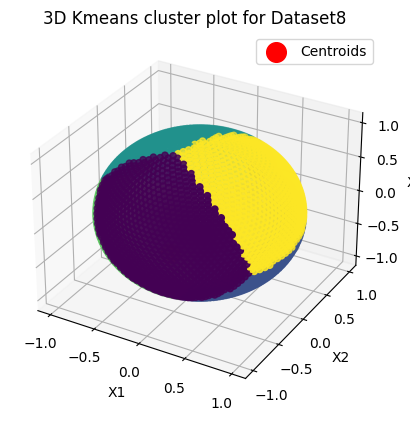

In [189]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.title("3D Kmeans cluster plot for Dataset8")
ax.scatter(df8_cluster['X1'], df8_cluster['X2'], df8_cluster['X3'], c=df8_cluster['Cluster'], cmap='viridis')
ax.scatter(centroid8[:, 0], centroid8[:, 1], centroid8[:,2],c = 'red', s = 200, label = 'Centroids')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend()
plt.ion()
plt.show()

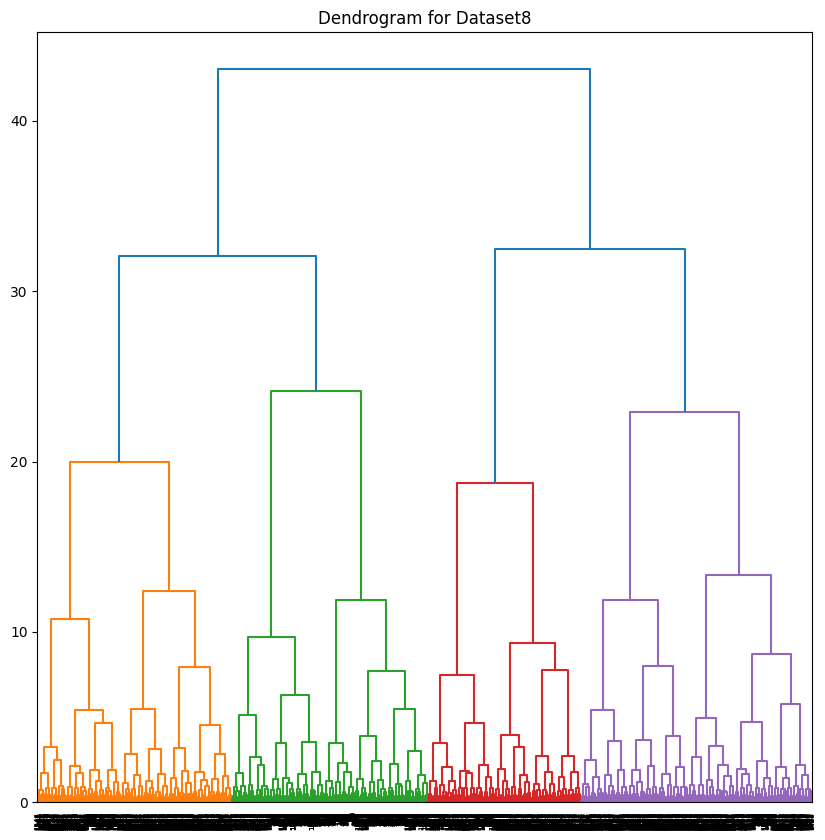

In [190]:
%matplotlib inline
plt.figure(figsize = (10, 10))
dendrogram = sch.dendrogram(sch.linkage(df8_cluster.iloc[:,0:3], method = 'ward'))
plt.title('Dendrogram for Dataset8')
plt.show()

## **Task 2**

In [195]:
#reading the world indicators dataset and creating a dataframe out of it
df9 = pd.read_csv('World Indicators.csv')

In [196]:
df9

Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0         0.025             72.0%                    25.0       41852.0   
1         0.046             52.1%                    66.0       13576.0   
2         0.037             65.9%                    29.0        3761.0   
3         0.024             19.5%                    60.0        2215.0   
4         0.042             43.5%                    13.0           NaN   
..          ...               ...                     ...           ...   
203         NaN               NaN                     NaN           NaN   
204       0.013             46.5%                     5.0     2191193.0   
205       0.015             41.9%                     7.0        4430.0   
206       0.020             62.8%                   141.0       70198.0   
207       0.011               NaN                     NaN           NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,864,638             0.044              $233            451.0   
1       $104,115,863,405             0.034              $178            282.0   
2         $7,294,900,431             0.045               $34            270.0   
3        $15,292,424,757             0.052              $404            152.0   
4        $10,395,757,480             0.064               $39            270.0   
..                   ...               ...               ...              ...   
203                  NaN               NaN               NaN              NaN   
204  $15,533,800,000,000             0.177            $8,467            187.0   
205      $47,236,710,623             0.088            $1,213            336.0   
206     $316,482,176,579             0.045              $487            864.0   
207                  NaN               NaN               NaN              NaN   

     Infant Mortality Rate  Internet Usage  Lending Interest  \
0                    0.023             0.1             0.080   
1                    0.107             0.1             0.188   
2                    0.060             0.0               NaN   
3                    0.039             0.1             0.110   
4                    0.068             0.0               NaN   
..                     ...             ...               ...   
203                    NaN             NaN               NaN   
204                  0.006             0.7             0.033   
205                  0.010             0.5             0.098   
206                  0.014             0.4             0.172   
207                    NaN             0.4               NaN   

     Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                      72.0                  69.0                 0.9   
1                      53.0                  50.0                 0.5   
2                      60.0                  58.0                 0.8   
3                      46.0                  47.0                 1.5   
4                      56.0                  55.0                 0.5   
..                      ...                   ...                 ...   
203                     NaN                   NaN                 NaN   
204                    81.0                  76.0                 0.9   
205                    80.0                  73.0                 1.4   
206                    77.0                  71.0                 1.0   
207                    83.0                  76.0                 NaN   

     Population 0-14  Population 15-64  Population 65+  Population Urban  \
0              0.272             0.681           0.047             0.682   
1              0.477             0.499           0.024             0.409   
2              0.432             0.539           0.029             0.423   
3              0.340             0.625           0.035             0.565   
4              0.458             0.517           0.025             0.265   
..               ...         

In [197]:
#calculating the total number of null values in every column of the dataset
nulls_per_column = df9.isna().sum(axis = 0)

In [198]:
print(nulls_per_column)

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64


In [199]:
#Dropping columns energy usage and lending interest since there exists maximum nulls
df9 = df9.drop(columns = 'Energy Usage')

In [200]:
df9

Birth Rate Business Tax Rate  Days to Start Business  \
0         0.025             72.0%                    25.0   
1         0.046             52.1%                    66.0   
2         0.037             65.9%                    29.0   
3         0.024             19.5%                    60.0   
4         0.042             43.5%                    13.0   
..          ...               ...                     ...   
203         NaN               NaN                     NaN   
204       0.013             46.5%                     5.0   
205       0.015             41.9%                     7.0   
206       0.020             62.8%                   141.0   
207       0.011               NaN                     NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,864,638             0.044              $233            451.0   
1       $104,115,863,405             0.034              $178            282.0   
2         $7,294,900,431             0.045               $34            270.0   
3        $15,292,424,757             0.052              $404            152.0   
4        $10,395,757,480             0.064               $39            270.0   
..                   ...               ...               ...              ...   
203                  NaN               NaN               NaN              NaN   
204  $15,533,800,000,000             0.177            $8,467            187.0   
205      $47,236,710,623             0.088            $1,213            336.0   
206     $316,482,176,579             0.045              $487            864.0   
207                  NaN               NaN               NaN              NaN   

     Infant Mortality Rate  Internet Usage  Lending Interest  \
0                    0.023             0.1             0.080   
1                    0.107             0.1             0.188   
2                    0.060             0.0               NaN   
3                    0.039             0.1             0.110   
4                    0.068             0.0               NaN   
..                     ...             ...               ...   
203                    NaN             NaN               NaN   
204                  0.006             0.7             0.033   
205                  0.010             0.5             0.098   
206                  0.014             0.4             0.172   
207                    NaN             0.4               NaN   

     Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                      72.0                  69.0                 0.9   
1                      53.0                  50.0                 0.5   
2                      60.0                  58.0                 0.8   
3                      46.0                  47.0                 1.5   
4                      56.0                  55.0                 0.5   
..                      ...                   ...                 ...   
203                     NaN                   NaN                 NaN   
204                    81.0                  76.0                 0.9   
205                    80.0                  73.0                 1.4   
206                    77.0                  71.0                 1.0   
207                    83.0                  76.0                 NaN   

     Population 0-14  Population 15-64  Population 65+  Population Urban  \
0              0.272             0.681           0.047             0.682   
1              0.477             0.499           0.024             0.409   
2              0.432             0.539           0.029             0.423   
3              0.340             0.625           0.035             0.565   
4              0.458             0.517           0.025             0.265   
..               ...               ...             ...               ...   
203              NaN               NaN             NaN             0.907   
204            0.197             0.669       

In [201]:
df9 = df9.drop(columns = 'Lending Interest')

In [202]:
df9

Birth Rate Business Tax Rate  Days to Start Business  \
0         0.025             72.0%                    25.0   
1         0.046             52.1%                    66.0   
2         0.037             65.9%                    29.0   
3         0.024             19.5%                    60.0   
4         0.042             43.5%                    13.0   
..          ...               ...                     ...   
203         NaN               NaN                     NaN   
204       0.013             46.5%                     5.0   
205       0.015             41.9%                     7.0   
206       0.020             62.8%                   141.0   
207       0.011               NaN                     NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,864,638             0.044              $233            451.0   
1       $104,115,863,405             0.034              $178            282.0   
2         $7,294,900,431             0.045               $34            270.0   
3        $15,292,424,757             0.052              $404            152.0   
4        $10,395,757,480             0.064               $39            270.0   
..                   ...               ...               ...              ...   
203                  NaN               NaN               NaN              NaN   
204  $15,533,800,000,000             0.177            $8,467            187.0   
205      $47,236,710,623             0.088            $1,213            336.0   
206     $316,482,176,579             0.045              $487            864.0   
207                  NaN               NaN               NaN              NaN   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                    0.023             0.1                    72.0   
1                    0.107             0.1                    53.0   
2                    0.060             0.0                    60.0   
3                    0.039             0.1                    46.0   
4                    0.068             0.0                    56.0   
..                     ...             ...                     ...   
203                    NaN             NaN                     NaN   
204                  0.006             0.7                    81.0   
205                  0.010             0.5                    80.0   
206                  0.014             0.4                    77.0   
207                    NaN             0.4                    83.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                    69.0                 0.9            0.272   
1                    50.0                 0.5            0.477   
2                    58.0                 0.8            0.432   
3                    47.0                 1.5            0.340   
4                    55.0                 0.5            0.458   
..                    ...                 ...              ...   
203                   NaN                 NaN              NaN   
204                  76.0                 0.9            0.197   
205                  73.0                 1.4            0.223   
206                  71.0                 1.0            0.291   
207                  76.0                 NaN            0.206   

     Population 15-64  Population 65+  Population Urban        Region  \
0               0.681           0.047             0.682        Africa   
1               0.499           0.024             0.409        Africa   
2               0.539           0.029             0.423        Africa   
3               0.625           0.035             0.565        Africa   
4               0.517           0.025             0.265        Africa   
..                ...             ...               ...           ...   
203               NaN             NaN             0.907  The Americas   
204             0.669           0.133             0.809  The Americas   
205     

In [204]:
#repeating the above step after dropping the column which was not required for analysis
null_counts = df9.isna().sum(axis = 1)

In [205]:
print(null_counts)

0       0
1       0
2       0
3       0
4       0
       ..
203    15
204     0
205     0
206     0
207     8
Length: 208, dtype: int64


In [206]:
#dropping any remaining countries with null data
df9_subset = df9.dropna(subset = df9.columns, thresh=len(df9.columns))

In [207]:
df9_subset

Birth Rate Business Tax Rate  Days to Start Business  \
0         0.025             72.0%                    25.0   
1         0.046             52.1%                    66.0   
2         0.037             65.9%                    29.0   
3         0.024             19.5%                    60.0   
4         0.042             43.5%                    13.0   
..          ...               ...                     ...   
201       0.018             27.9%                   694.0   
202       0.015             29.1%                    41.0   
204       0.013             46.5%                     5.0   
205       0.015             41.9%                     7.0   
206       0.020             62.8%                   141.0   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,864,638             0.044              $233            451.0   
1       $104,115,863,405             0.034              $178            282.0   
2         $7,294,900,431             0.045               $34            270.0   
3        $15,292,424,757             0.052              $404            152.0   
4        $10,395,757,480             0.064               $39            270.0   
..                   ...               ...               ...              ...   
201       $4,363,219,094             0.060              $490            199.0   
202      $23,676,348,287             0.053              $935            210.0   
204  $15,533,800,000,000             0.177            $8,467            187.0   
205      $47,236,710,623             0.088            $1,213            336.0   
206     $316,482,176,579             0.045              $487            864.0   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                    0.023             0.1                    72.0   
1                    0.107             0.1                    53.0   
2                    0.060             0.0                    60.0   
3                    0.039             0.1                    46.0   
4                    0.068             0.0                    56.0   
..                     ...             ...                     ...   
201                  0.022             0.3                    74.0   
202                  0.020             0.6                    73.0   
204                  0.006             0.7                    81.0   
205                  0.010             0.5                    80.0   
206                  0.014             0.4                    77.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                    69.0                 0.9            0.272   
1                    50.0                 0.5            0.477   
2                    58.0                 0.8            0.432   
3                    47.0                 1.5            0.340   
4                    55.0                 0.5            0.458   
..                    ...                 ...              ...   
201                  67.0                 1.0            0.283   
202                  66.0                 1.4            0.207   
204                  76.0                 0.9            0.197   
205                  73.0                 1.4            0.223   
206                  71.0                 1.0            0.291   

     Population 15-64  Population 65+  Population Urban        Region  \
0               0.681           0.047             0.682        Africa   
1               0.499           0.024             0.409        Africa   
2               0.539           0.029             0.423        Africa   
3               0.625           0.035             0.565        Africa   
4               0.517           0.025             0.265        Africa   
..                ...             ...               ...           ...   
201             0.652           0.065             0.663  The Americas   
202             0.708           0.085             0.089  The Americas   
204     

In [208]:
null_counts = df9_subset.isna().sum(axis=1)

In [210]:
#now, we can confirm that there are no null values in the dataframe and proceed with the tasks 
print(null_counts)

0      0
1      0
2      0
3      0
4      0
      ..
201    0
202    0
204    0
205    0
206    0
Length: 171, dtype: int64


In [211]:
#in this block, we are converting values of specific columns into float type
cols_to_convert = ['Health Exp/Capita', 'GDP', 'Business Tax Rate']
df9_subset[cols_to_convert] = df9_subset[cols_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', '').str.replace('$', '').str.rstrip('%')).astype('float'))

In [212]:
df9_subset

Birth Rate  Business Tax Rate  Days to Start Business           GDP  \
0         0.025               72.0                    25.0  1.990709e+11   
1         0.046               52.1                    66.0  1.041159e+11   
2         0.037               65.9                    29.0  7.294900e+09   
3         0.024               19.5                    60.0  1.529242e+10   
4         0.042               43.5                    13.0  1.039576e+10   
..          ...                ...                     ...           ...   
201       0.018               27.9                   694.0  4.363219e+09   
202       0.015               29.1                    41.0  2.367635e+10   
204       0.013               46.5                     5.0  1.553380e+13   
205       0.015               41.9                     7.0  4.723671e+10   
206       0.020               62.8                   141.0  3.164822e+11   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0               0.044              233.0            451.0   
1               0.034              178.0            282.0   
2               0.045               34.0            270.0   
3               0.052              404.0            152.0   
4               0.064               39.0            270.0   
..                ...                ...              ...   
201             0.060              490.0            199.0   
202             0.053              935.0            210.0   
204             0.177             8467.0            187.0   
205             0.088             1213.0            336.0   
206             0.045              487.0            864.0   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                    0.023             0.1                    72.0   
1                    0.107             0.1                    53.0   
2                    0.060             0.0                    60.0   
3                    0.039             0.1                    46.0   
4                    0.068             0.0                    56.0   
..                     ...             ...                     ...   
201                  0.022             0.3                    74.0   
202                  0.020             0.6                    73.0   
204                  0.006             0.7                    81.0   
205                  0.010             0.5                    80.0   
206                  0.014             0.4                    77.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                    69.0                 0.9            0.272   
1                    50.0                 0.5            0.477   
2                    58.0                 0.8            0.432   
3                    47.0                 1.5            0.340   
4                    55.0                 0.5            0.458   
..                    ...                 ...              ...   
201                  67.0                 1.0            0.283   
202                  66.0                 1.4            0.207   
204                  76.0                 0.9            0.197   
205                  73.0                 1.4            0.223   
206                  71.0                 1.0            0.291   

     Population 15-64  Population 65+  Population Urban        Region  \
0               0.681           0.047             0.682        Africa   
1               0.499           0.024             0.409        Africa   
2               0.539           0.029             0.423        Africa   
3               0.625           0.035             0.565        Africa   
4               0.517           0.025             0.265        Africa   
..                ...             ...               ...           ...   
201             0.652           0.065             0.663  The Americas   
202             0.708           0.085             0.089  The Americas   
204             0.669           0.133             0.809  The America

In [213]:
df9_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              171 non-null    float64
 1   Business Tax Rate       171 non-null    float64
 2   Days to Start Business  171 non-null    float64
 3   GDP                     171 non-null    float64
 4   Health Exp % GDP        171 non-null    float64
 5   Health Exp/Capita       171 non-null    float64
 6   Hours to do Tax         171 non-null    float64
 7   Infant Mortality Rate   171 non-null    float64
 8   Internet Usage          171 non-null    float64
 9   Life Expectancy Female  171 non-null    float64
 10  Life Expectancy Male    171 non-null    float64
 11  Mobile Phone Usage      171 non-null    float64
 12  Population 0-14         171 non-null    float64
 13  Population 15-64        171 non-null    float64
 14  Population 65+          171 non-null    fl

In [214]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df9_subset.iloc[:,0:16] = scaler.fit_transform(df9_subset.iloc[:,0:16])

In [215]:
df9_subset

Birth Rate  Business Tax Rate  Days to Start Business        GDP  \
0      0.241085           0.733673               -0.099269  -0.145350   
1      2.169232           0.189712                0.611634  -0.210537   
2      1.342883           0.566931               -0.029912  -0.277006   
3      0.149269          -0.701399                0.507600  -0.271515   
4      1.801966          -0.045366               -0.307338  -0.274877   
..          ...                ...                     ...        ...   
201   -0.401630          -0.471787               11.500591  -0.279018   
202   -0.677080          -0.438986                0.178157  -0.265760   
204   -0.860713           0.036638               -0.446051  10.382036   
205   -0.677080          -0.089102               -0.411373  -0.249585   
206   -0.217997           0.482194                1.912067  -0.064747   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0           -0.874226          -0.454207         0.662583   
1           -1.238575          -0.483635        -0.007818   
2           -0.837791          -0.560683        -0.055420   
3           -0.582746          -0.362713        -0.523511   
4           -0.145527          -0.558008        -0.055420   
..                ...                ...              ...   
201         -0.291267          -0.316698        -0.337068   
202         -0.546311          -0.078600        -0.293432   
204          3.971623           3.951423        -0.384670   
205          0.728912           0.070145         0.206393   
206         -0.837791          -0.318304         2.300901   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                -0.174521       -0.934401               -0.018487   
1                 3.159010       -0.934401               -1.895467   
2                 1.293820       -1.291058               -1.203948   
3                 0.460438       -0.934401               -2.586986   
4                 1.611300       -1.291058               -1.599102   
..                     ...             ...                     ...   
201              -0.214206       -0.221086                0.179090   
202              -0.293575        0.848886                0.080302   
204              -0.849164        1.205544                0.870609   
205              -0.690424        0.492229                0.771821   
206              -0.531685        0.135572                0.475455   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                0.167855           -0.130010        -0.158467   
1               -1.979233           -1.152154         1.730363   
2               -1.075196           -0.385546         1.315742   
3               -2.318247            1.403207         0.468072   
4               -1.414210           -1.152154         1.555301   
..                    ...                 ...              ...   
201             -0.058154            0.125526        -0.057115   
202             -0.171159            1.147671        -0.757364   
204              0.958887           -0.130010        -0.849502   
205              0.619873            1.147671        -0.609943   
206              0.393864            0.125526         0.016596   

     Population 15-64  Population 65+  Population Urban        Region  \
0            0.668944       -0.558750          0.541928        Africa   
1           -1.888970       -0.982336         -0.636900        Africa   
2           -1.326792       -0.890252         -0.576447        Africa   
3           -0.118107       -0.779751          0.036716        Africa   
4           -1.635990       -0.963919         -1.258699        Africa   
..                ...             ...               ...           ...   
201          0.261364       -0.227248          0.459885  The Americas   
202          1.048414        0.141088         -2.018676  The Americas   
204          0.500290        1.025093          1.090320  The Americas   
205          0.064601        1.

In [217]:
#here, we are implementing the elbow method to perform K-means clustering 
k9 = []
wcss9 = []
for i in range(1,11):
  md9 = KMeans(n_clusters = i, n_init = 10)
  md9.fit(df9_subset.iloc[:,0:16])
  k9.append(i)
  wcss9.append(md9.inertia_)

Text(0.5, 1.0, 'Elbow Method for Optimal K')

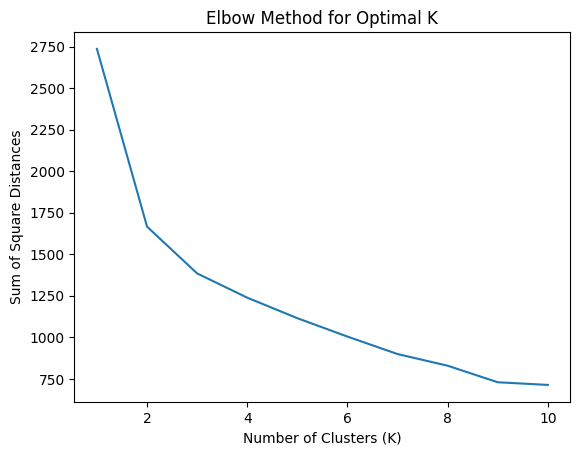

In [219]:
sns.lineplot(x = k9, y = wcss9)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")

In [220]:
#from the above graph, we can conclude that we have two optimal clusters
KModel9 = KMeans(n_clusters = 2,
             init = 'k-means++',)
KModel9.fit(df9_subset.iloc[:,0:16])

KMeans(n_clusters=2)

In [221]:
KModel9.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [222]:
centroid9 = KModel9.cluster_centers_

In [223]:
#Assigning labels to the original dataset
df9_subset['KMeans Prediction'] = KModel9.labels_

In [224]:
df9_subset

Birth Rate  Business Tax Rate  Days to Start Business        GDP  \
0      0.241085           0.733673               -0.099269  -0.145350   
1      2.169232           0.189712                0.611634  -0.210537   
2      1.342883           0.566931               -0.029912  -0.277006   
3      0.149269          -0.701399                0.507600  -0.271515   
4      1.801966          -0.045366               -0.307338  -0.274877   
..          ...                ...                     ...        ...   
201   -0.401630          -0.471787               11.500591  -0.279018   
202   -0.677080          -0.438986                0.178157  -0.265760   
204   -0.860713           0.036638               -0.446051  10.382036   
205   -0.677080          -0.089102               -0.411373  -0.249585   
206   -0.217997           0.482194                1.912067  -0.064747   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0           -0.874226          -0.454207         0.662583   
1           -1.238575          -0.483635        -0.007818   
2           -0.837791          -0.560683        -0.055420   
3           -0.582746          -0.362713        -0.523511   
4           -0.145527          -0.558008        -0.055420   
..                ...                ...              ...   
201         -0.291267          -0.316698        -0.337068   
202         -0.546311          -0.078600        -0.293432   
204          3.971623           3.951423        -0.384670   
205          0.728912           0.070145         0.206393   
206         -0.837791          -0.318304         2.300901   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                -0.174521       -0.934401               -0.018487   
1                 3.159010       -0.934401               -1.895467   
2                 1.293820       -1.291058               -1.203948   
3                 0.460438       -0.934401               -2.586986   
4                 1.611300       -1.291058               -1.599102   
..                     ...             ...                     ...   
201              -0.214206       -0.221086                0.179090   
202              -0.293575        0.848886                0.080302   
204              -0.849164        1.205544                0.870609   
205              -0.690424        0.492229                0.771821   
206              -0.531685        0.135572                0.475455   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                0.167855           -0.130010        -0.158467   
1               -1.979233           -1.152154         1.730363   
2               -1.075196           -0.385546         1.315742   
3               -2.318247            1.403207         0.468072   
4               -1.414210           -1.152154         1.555301   
..                    ...                 ...              ...   
201             -0.058154            0.125526        -0.057115   
202             -0.171159            1.147671        -0.757364   
204              0.958887           -0.130010        -0.849502   
205              0.619873            1.147671        -0.609943   
206              0.393864            0.125526         0.016596   

     Population 15-64  Population 65+  Population Urban        Region  \
0            0.668944       -0.558750          0.541928        Africa   
1           -1.888970       -0.982336         -0.636900        Africa   
2           -1.326792       -0.890252         -0.576447        Africa   
3           -0.118107       -0.779751          0.036716        Africa   
4           -1.635990       -0.963919         -1.258699        Africa   
..                ...             ...               ...           ...   
201          0.261364       -0.227248          0.459885  The Americas   
202          1.048414        0.141088         -2.018676  The Americas   
204          0.500290        1.025093          1.090320  The Americas   
205          0.064601        1.

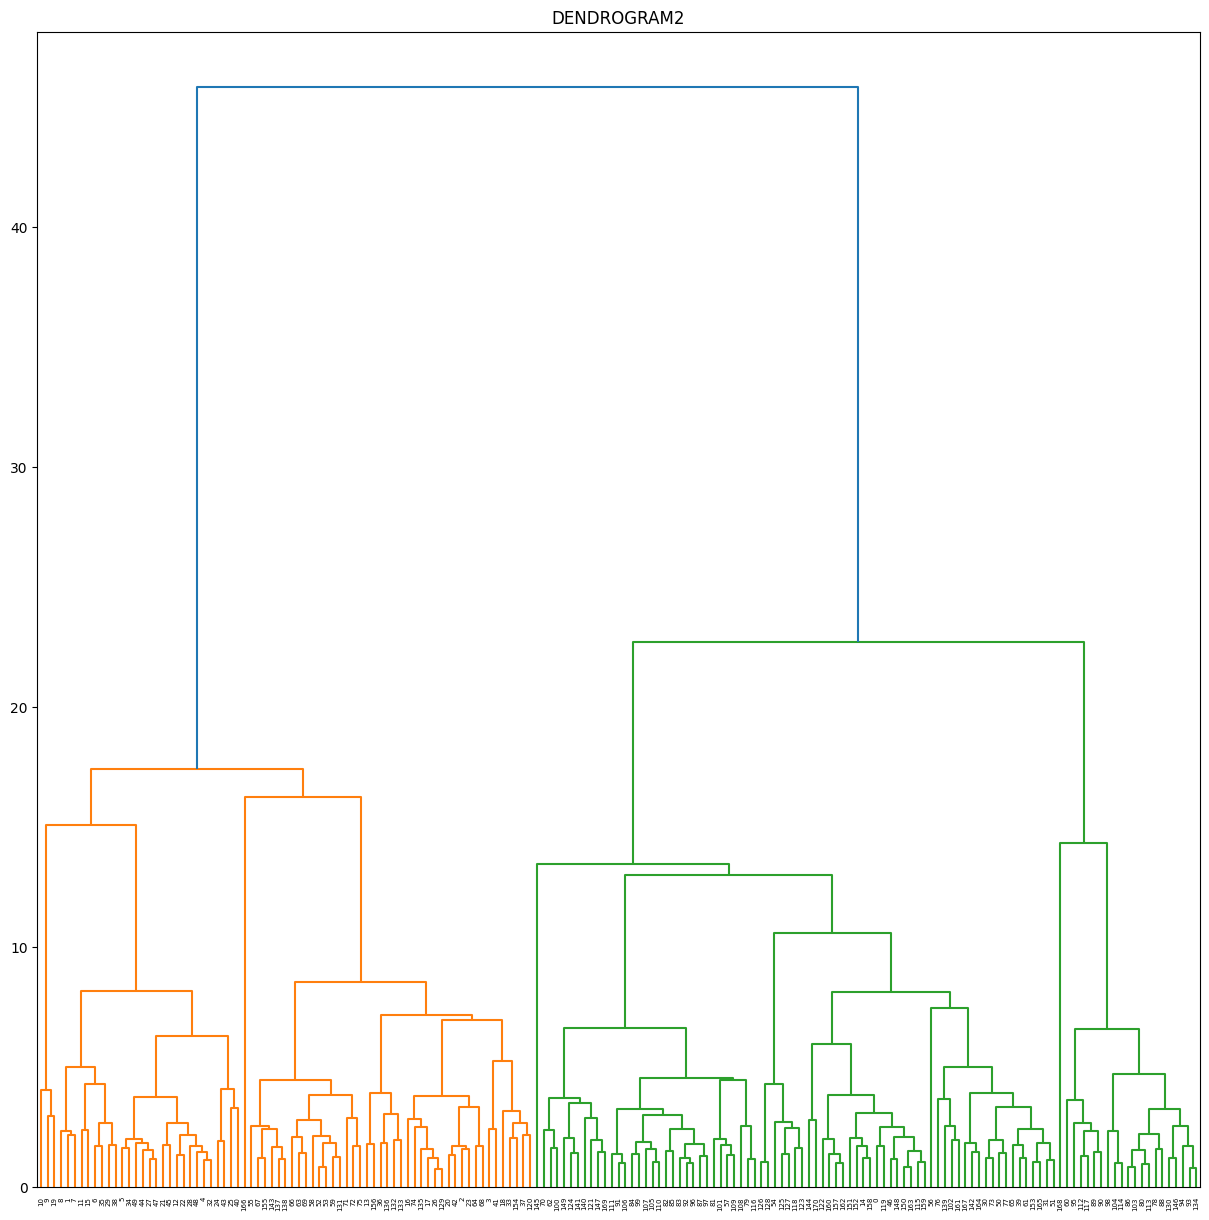

In [225]:
#performing hierarchical clustering through the means of a dendogram
%matplotlib inline
plt.figure(figsize = (15, 15))
dendrogram = sch.dendrogram(sch.linkage(df9_subset.iloc[:,0:16], method = 'ward'))
plt.title('DENDROGRAM2')
plt.show()

In [227]:
#importing the necessary libraries to perform agglomerative clustering and performing it 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')  
labels = cluster.fit_predict(df9_subset.iloc[:,0:16])

In [228]:
labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [229]:
#here, we are adding the labels column to the original dataset
df9_subset['Hierarchical Prediction'] = cluster.labels_

In [230]:
df9_subset

Birth Rate  Business Tax Rate  Days to Start Business        GDP  \
0      0.241085           0.733673               -0.099269  -0.145350   
1      2.169232           0.189712                0.611634  -0.210537   
2      1.342883           0.566931               -0.029912  -0.277006   
3      0.149269          -0.701399                0.507600  -0.271515   
4      1.801966          -0.045366               -0.307338  -0.274877   
..          ...                ...                     ...        ...   
201   -0.401630          -0.471787               11.500591  -0.279018   
202   -0.677080          -0.438986                0.178157  -0.265760   
204   -0.860713           0.036638               -0.446051  10.382036   
205   -0.677080          -0.089102               -0.411373  -0.249585   
206   -0.217997           0.482194                1.912067  -0.064747   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0           -0.874226          -0.454207         0.662583   
1           -1.238575          -0.483635        -0.007818   
2           -0.837791          -0.560683        -0.055420   
3           -0.582746          -0.362713        -0.523511   
4           -0.145527          -0.558008        -0.055420   
..                ...                ...              ...   
201         -0.291267          -0.316698        -0.337068   
202         -0.546311          -0.078600        -0.293432   
204          3.971623           3.951423        -0.384670   
205          0.728912           0.070145         0.206393   
206         -0.837791          -0.318304         2.300901   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                -0.174521       -0.934401               -0.018487   
1                 3.159010       -0.934401               -1.895467   
2                 1.293820       -1.291058               -1.203948   
3                 0.460438       -0.934401               -2.586986   
4                 1.611300       -1.291058               -1.599102   
..                     ...             ...                     ...   
201              -0.214206       -0.221086                0.179090   
202              -0.293575        0.848886                0.080302   
204              -0.849164        1.205544                0.870609   
205              -0.690424        0.492229                0.771821   
206              -0.531685        0.135572                0.475455   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                0.167855           -0.130010        -0.158467   
1               -1.979233           -1.152154         1.730363   
2               -1.075196           -0.385546         1.315742   
3               -2.318247            1.403207         0.468072   
4               -1.414210           -1.152154         1.555301   
..                    ...                 ...              ...   
201             -0.058154            0.125526        -0.057115   
202             -0.171159            1.147671        -0.757364   
204              0.958887           -0.130010        -0.849502   
205              0.619873            1.147671        -0.609943   
206              0.393864            0.125526         0.016596   

     Population 15-64  Population 65+  Population Urban        Region  \
0            0.668944       -0.558750          0.541928        Africa   
1           -1.888970       -0.982336         -0.636900        Africa   
2           -1.326792       -0.890252         -0.576447        Africa   
3           -0.118107       -0.779751          0.036716        Africa   
4           -1.635990       -0.963919         -1.258699        Africa   
..                ...             ...               ...           ...   
201          0.261364       -0.227248          0.459885  The Americas   
202          1.048414        0.141088         -2.018676  The Americas   
204          0.500290        1.025093          1.090320  The Americas   
205          0.064601        1.

In [232]:
#conducting internal validation through different methods

# Determining K-means silhouette score

from sklearn import metrics

print('K-means Silhouette Score:',metrics.silhouette_score(df9_subset.iloc[:,0:16], df9_subset['KMeans Prediction']))

K-means Silhouette Score: 0.361108968463887


In [234]:
# Determining K-means Calinski-Harabasz score

import sklearn 
print('K-means Calinski-Harabasz Score:',sklearn.metrics.calinski_harabasz_score(df9_subset.iloc[:,0:16], df9_subset['KMeans Prediction']))

K-means Calinski-Harabasz Score: 108.54562732127647


In [236]:
#intalling validclust module 
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [238]:
# Determining K-means Dunn Index score

from validclust import dunn
from sklearn.metrics import pairwise_distances

print('K-means Dunn Index Score:', dunn(pairwise_distances(df9_subset.iloc[:,0:16]), df9_subset['KMeans Prediction']))

K-means Dunn Index Score: 0.06697056305227665


In [239]:
# Determining hierarchical Silhouette score

print('Hierarchical Silhouette Score:', metrics.silhouette_score(df9_subset.iloc[:,0:16], df9_subset['Hierarchical Prediction']))

Hierarchical Silhouette Score: 0.35327630525116543


In [240]:
# Determining hierarchical Calinski-Harabasz score

print('Hierarchical Calinski-Harabasz Score:', sklearn.metrics.calinski_harabasz_score(df9_subset.iloc[:,0:16], df9_subset['Hierarchical Prediction']))

Hierarchical Calinski-Harabasz Score: 105.43473274338285


In [241]:
# Determining hierarchical Dunn Index score

print('Hierarchical Dunn Index Score:', dunn(pairwise_distances(df9_subset.iloc[:,0:16]), df9_subset['Hierarchical Prediction']))

Hierarchical Dunn Index Score: 0.08888902262316713


Hence, we can conclude that K-means is the method with the best clustering solution, as two out of three internal validation metrics produce higher scores than those of the hierarchical solution.

In [242]:
#K-means
print('K-means Cluster 0:')
print(df9_subset[df9_subset['KMeans Prediction'] == 0]['Country'].values.tolist())
print('K-means Cluster 1:')
print(df9_subset[df9_subset['KMeans Prediction'] == 1]['Country'].values.tolist())

K-means Cluster 0:
['Algeria', 'Egypt, Arab Rep.', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'China', 'Georgia', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Malaysia', 'Mongolia', 'Singapore', 'Sri Lanka', 'Thailand', 'Vietnam', 'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Bahrain', 'Iran, Islamic Rep.', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Australia', 'Fiji', 'New Zealand', 'Antigua and Barbuda', 'Argentina', 'Bahamas, 

In [243]:
#Hierarchical
print('Hierarchical Cluster 0:')
print(df9_subset[df9_subset['Hierarchical Prediction']==0]['Country'].values.tolist())
print('Hierarchical Cluster 1:')
print(df9_subset[df9_subset['Hierarchical Prediction']==1]['Country'].values.tolist())

Hierarchical Cluster 0:
['Algeria', 'Egypt, Arab Rep.', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'China', 'Georgia', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Malaysia', 'Singapore', 'Thailand', 'Vietnam', 'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Bahrain', 'Iran, Islamic Rep.', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Australia', 'New Zealand', 'Antigua and Barbuda', 'Argentina', 'Bahamas, The', 'Barbados', 'Bolivia',

Text(0.5, 1.0, 'Life Expectancy of Male vs. Age (K-means)')

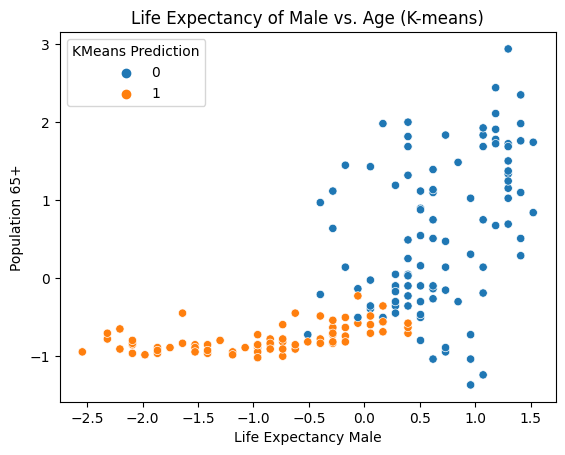

In [248]:
#here, we are creating appropriate scatter plots
sns.scatterplot(x = 'Life Expectancy Male', y='Population 65+', hue='KMeans Prediction', data=df9_subset)
plt.title('Life Expectancy of Male vs. Age (K-means)')


Text(0.5, 1.0, 'Infant Mortality Rate vs. GDP (K-means)')

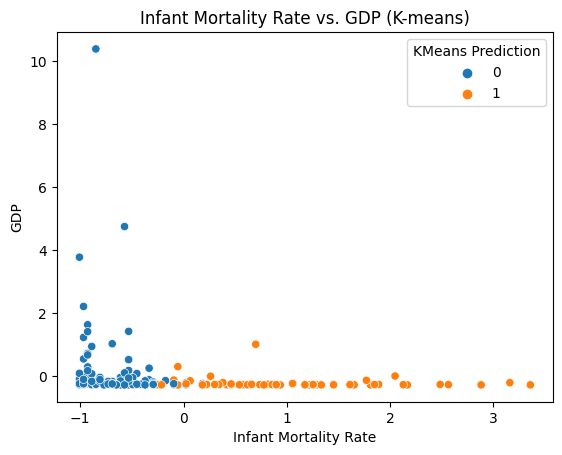

In [249]:
sns.scatterplot(x = df9_subset['Infant Mortality Rate'], y = df9_subset['GDP'], hue = df9_subset['KMeans Prediction'])
plt.title('Infant Mortality Rate vs. GDP (K-means)')

Text(0.5, 1.0, 'Mobile Phone Usage vs. Hours to do Tax (K-means)')

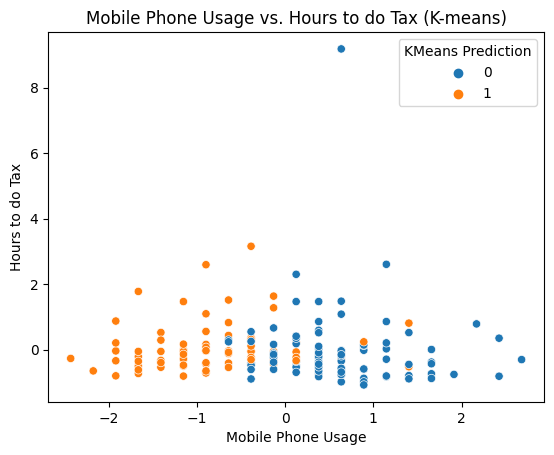

In [250]:
sns.scatterplot(x = df9_subset['Mobile Phone Usage'], y = df9_subset['Hours to do Tax'], hue = df9_subset['KMeans Prediction'])
plt.title('Mobile Phone Usage vs. Hours to do Tax (K-means)')

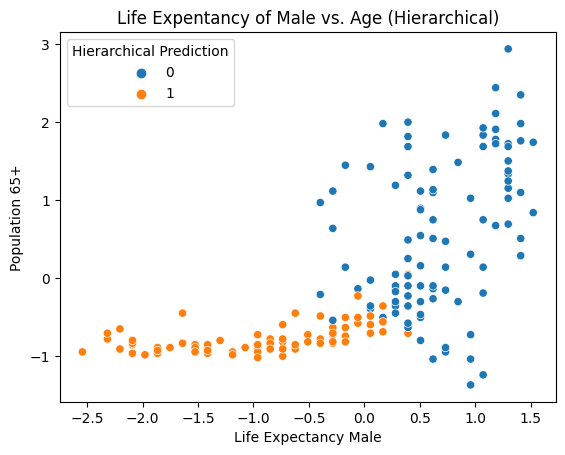

In [253]:
sns.scatterplot(x = 'Life Expectancy Male', y = 'Population 65+', hue = 'Hierarchical Prediction', data = df9_subset)
plt.title('Life Expentancy of Male vs. Age (Hierarchical)')
plt.show()

Text(0.5, 1.0, 'Infant Mortality Rate vs. GDP (Hierarchical)')

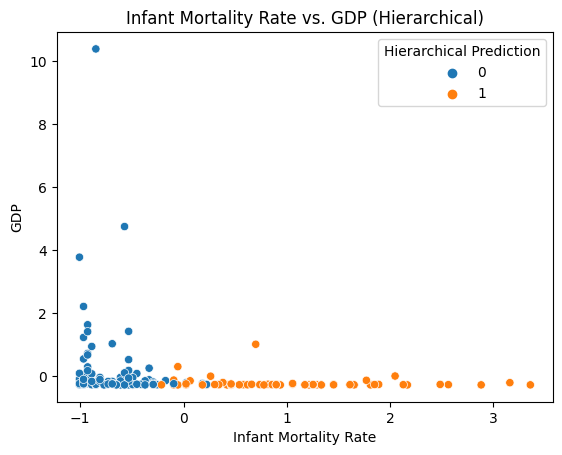

In [254]:
sns.scatterplot(x = df9_subset['Infant Mortality Rate'], y = df9_subset['GDP'], hue = df9_subset['Hierarchical Prediction'])
plt.title('Infant Mortality Rate vs. GDP (Hierarchical)')

Text(0.5, 1.0, 'Mobile Phone Usage vs. Hours to do Tax (Hierarchical)')

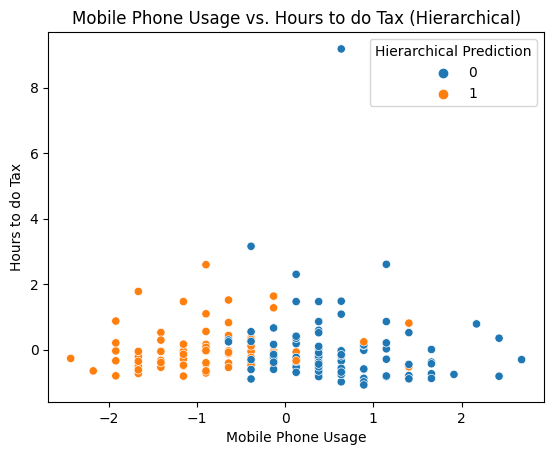

In [255]:
sns.scatterplot(x = df9_subset['Mobile Phone Usage'], y = df9_subset['Hours to do Tax'], hue = df9_subset['Hierarchical Prediction'])
plt.title('Mobile Phone Usage vs. Hours to do Tax (Hierarchical)')

**END**